In [1]:
import os
import glob
import pickle
from functools import partial
from pathlib import Path

import seaborn as sns
from zepid.graphics import EffectMeasurePlot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)

from IPython.core.debugger import set_trace

import directory_structure as ds

%load_ext autoreload
%autoreload 2

# DataFrame Wrapper

In [2]:
def debug_groupby(groups):
    for name, grp in groups:
        display(grp)

class DataFrameIndexWrapper:
    def __init__(self, df):
        self.df = df
        
    def __getitem__(self, item):
        return self.df.loc[item]
    
    def __call__(self, *args, **kwargs):
        if len(args) == 0:
            args = df.columns
        index = [kwargs.get(idx, slice(None)) for idx in self.df.index.names]
        return self.df.loc[tuple(index), tuple(args)]
    
    def get_group_data(self, level, score):
        grps = self.df.groupby(level=level)
        dfs = []
        for name, df in grps:
            if isinstance(name, tuple):
                group_name = '-'.join(name)
            else:
                group_name = name
            grp_df = pd.DataFrame({
                'group': np.repeat([group_name], repeats=len(df)),
                'score': df[score].reset_index(drop=True), 
            })

            dfs.append(grp_df)
        dfs = pd.concat(dfs, axis=0)
        dfs.set_index('group', inplace=True)
        return dfs 

# Pickle Loading 

Loads pickles in current analysis directory and loads them into global vars.

In [3]:
make_dirs = True
current_analysis = 'v2-eegnet-svm-july-14-2022'
pickles_path = os.path.join(ds.ROOT_DIR, 'analysis', current_analysis, 'pickles')

def pickle_load(file): 
    with open(file, 'rb') as f:
        return pickle.load(f)
    
for file in os.listdir(pickles_path):
    if file.endswith(".pkl"):
        var = file.split('.')[0]
        abs_file_path = os.path.join(pickles_path, file)
        globals()[var] = pickle_load(abs_file_path)

In [4]:
exps

{'eegnet': <__main__.DataFrameIndexWrapper at 0x7f2b9433ab50>,
 'svm': <__main__.DataFrameIndexWrapper at 0x7f2b942c64c0>}

In [5]:
bl_anlys

group1         group2  mean1  mean2   std1   std2   diff  \
exps   score                                                                    
eegnet PPV    BGSInt-BGSInt  BGSObs-BGSObs  0.056  0.044  0.033  0.024  0.013   
       PPV      OAObs-OAObs    OAOut-OAOut  0.031  0.094  0.025  0.061 -0.064   
       TNR    BGSInt-BGSInt  BGSObs-BGSObs  0.842  0.785  0.073  0.088  0.057   
       TNR      OAObs-OAObs    OAOut-OAOut  0.859  0.934  0.081  0.042 -0.075   
       TPR    BGSInt-BGSInt  BGSObs-BGSObs  0.717  0.632  0.191  0.161  0.085   
       TPR      OAObs-OAObs    OAOut-OAOut  0.541  0.801  0.215  0.167 -0.260   
       bACC   BGSInt-BGSInt  BGSObs-BGSObs  0.780  0.709  0.098  0.084  0.071   
       bACC     OAObs-OAObs    OAOut-OAOut  0.700  0.867  0.099  0.084 -0.167   
svm    PPV    BGSInt-BGSInt  BGSObs-BGSObs  0.034  0.028  0.019  0.012  0.007   
       PPV      OAObs-OAObs    OAOut-OAOut  0.015  0.067  0.007  0.046 -0.052   
       TNR    BGSInt-BGSInt  BGSObs-BGSObs  0.786  0.716  0.063  0.056  0.069   
       TNR      OAObs-OAObs    OAOut-OAOut  0.788  0.925  0.067  0.040 -0.137   
       TPR    BGSInt-BGSInt  BGSObs-BGSObs  0.623  0.585  0.166  0.164  0.038   
       TPR      OAObs-OAObs    OAOut-OAOut  0.495  0.671  0.175  0.210 -0.175   
       bACC   BGSInt-BGSInt  BGSObs-BGSObs  0.705  0.651  0.097  0.093  0.054   
       bACC     OAObs-OAObs    OAOut-OAOut  0.642  0.798  0.083  0.103 -0.156   

              conf.low  conf.high  n1  n2       df      p  Hedges_g    CI  \
exps   score                                                                
eegnet PPV       0.004      0.021  90  90  161.427  0.004     0.433  0.95   
       PPV      -0.077     -0.050  90  90  118.031  0.000    -1.347  0.95   
       TNR       0.033      0.081  90  90  171.537  0.000     0.700  0.95   
       TNR      -0.094     -0.056  90  90  133.123  0.000    -1.155  0.95   
       TPR       0.033      0.137  90  90  172.931  0.001     0.479  0.95   
       TPR      -0.317     -0.203  90  90  167.727  0.000    -1.346  0.95   
       bACC      0.044      0.098  90  90  174.031  0.000     0.774  0.95   
       bACC     -0.194     -0.140  90  90  173.206  0.000    -1.818  0.95   
svm    PPV       0.002      0.011  90  90  149.633  0.005     0.420  0.95   
       PPV      -0.062     -0.042  90  90   93.708  0.000    -1.567  0.95   
       TNR       0.052      0.087  90  90  175.753  0.000     1.148  0.95   
       TNR      -0.153     -0.121  90  90  145.581  0.000    -2.478  0.95   
       TPR      -0.010      0.087  90  90  177.973  0.120     0.232  0.95   
       TPR      -0.232     -0.118  90  90  172.249  0.000    -0.903  0.95   
       bACC      0.026      0.082  90  90  177.612  0.000     0.563  0.95   
       bACC     -0.184     -0.129  90  90  170.213  0.000    -1.664  0.95   

              CI_low  CI_high  
exps   score                   
eegnet PPV     0.138    0.727  
       PPV    -1.682   -1.008  
       TNR     0.398    0.999  
       TNR    -1.476   -0.832  
       TPR     0.183    0.774  
       TPR    -1.669   -1.020  
       bACC    0.471    1.075  
       bACC   -2.164   -1.468  
svm    PPV     0.124    0.714  
       PPV    -1.931   -1.198  
       TNR     0.832    1.462  
       TNR    -2.882   -2.069  
       TPR    -0.060    0.524  
       TPR    -1.208   -0.595  
       bACC    0.265    0.859  
       bACC   -2.003   -1.322

In [6]:
stst_anlys

p.adj.signif  p.adj         group1         group2  mean1  \
exps   score test                                                              
eegnet PPV   BGSInt         ****  0.000  BGSInt-BGSInt  BGSObs-BGSInt  0.056   
             BGSInt         ****  0.000  BGSInt-BGSInt   OAObs-BGSInt  0.056   
             BGSInt           ns  0.060  BGSInt-BGSInt   OAOut-BGSInt  0.056   
             BGSInt           ns  0.299  BGSObs-BGSInt   OAObs-BGSInt  0.034   
             BGSInt         ****  0.000  BGSObs-BGSInt   OAOut-BGSInt  0.034   
             BGSInt         ****  0.000   OAObs-BGSInt   OAOut-BGSInt  0.036   
             BGSObs           ns  0.389  BGSObs-BGSObs   OAOut-BGSObs  0.044   
             BGSObs            *  0.011  BGSObs-BGSObs   OAObs-BGSObs  0.044   
             BGSObs           ns  0.075   OAObs-BGSObs   OAOut-BGSObs  0.035   
             BGSObs         ****  0.000  BGSInt-BGSObs   OAObs-BGSObs  0.051   
             BGSObs            *  0.050  BGSInt-BGSObs  BGSObs-BGSObs  0.051   
             BGSObs         ****  0.000  BGSInt-BGSObs   OAOut-BGSObs  0.051   
             OAObs          ****  0.000   BGSObs-OAObs    OAOut-OAObs  0.013   
             OAObs          ****  0.000   BGSInt-OAObs   BGSObs-OAObs  0.017   
             OAObs          ****  0.000   BGSInt-OAObs    OAObs-OAObs  0.017   
             OAObs          ****  0.000   BGSInt-OAObs    OAOut-OAObs  0.017   
             OAObs          ****  0.000   BGSObs-OAObs    OAObs-OAObs  0.013   
             OAObs            ns  0.116    OAObs-OAObs    OAOut-OAObs  0.031   
             OAOut          ****  0.000   BGSInt-OAOut   BGSObs-OAOut  0.031   
             OAOut           ***  0.000   BGSInt-OAOut    OAObs-OAOut  0.031   
             OAOut          ****  0.000   BGSInt-OAOut    OAOut-OAOut  0.031   
             OAOut          ****  0.000   BGSObs-OAOut    OAObs-OAOut  0.019   
             OAOut          ****  0.000   BGSObs-OAOut    OAOut-OAOut  0.019   
             OAOut          ****  0.000    OAObs-OAOut    OAOut-OAOut  0.037   
       TNR   BGSInt         ****  0.000  BGSInt-BGSInt  BGSObs-BGSInt  0.842   
             BGSInt           **  0.007  BGSInt-BGSInt   OAObs-BGSInt  0.842   
             BGSInt         ****  0.000  BGSInt-BGSInt   OAOut-BGSInt  0.842   
             BGSInt         ****  0.000  BGSObs-BGSInt   OAObs-BGSInt  0.762   
             BGSInt         ****  0.000  BGSObs-BGSInt   OAOut-BGSInt  0.762   
             BGSInt         ****  0.000   OAObs-BGSInt   OAOut-BGSInt  0.869   
             BGSObs         ****  0.000  BGSObs-BGSObs   OAOut-BGSObs  0.785   
             BGSObs         ****  0.000  BGSObs-BGSObs   OAObs-BGSObs  0.785   
             BGSObs         ****  0.000   OAObs-BGSObs   OAOut-BGSObs  0.880   
             BGSObs         ****  0.000  BGSInt-BGSObs   OAObs-BGSObs  0.843   
             BGSObs         ****  0.000  BGSInt-BGSObs  BGSObs-BGSObs  0.843   
             BGSObs         ****  0.000  BGSInt-BGSObs   OAOut-BGSObs  0.843   
             OAObs          ****  0.000   BGSObs-OAObs    OAOut-OAObs  0.743   
             OAObs          ****  0.000   BGSInt-OAObs   BGSObs-OAObs  0.840   
             OAObs            ns  0.161   BGSInt-OAObs    OAObs-OAObs  0.840   
             OAObs          ****  0.000   BGSInt-OAObs    OAOut-OAObs  0.840   
             OAObs          ****  0.000   BGSObs-OAObs    OAObs-OAObs  0.743   
             OAObs          ****  0.000    OAObs-OAObs    OAOut-OAObs  0.859   
             OAOut          ****  0.000   BGSInt-OAOut   BGSObs-OAOut  0.823   
             OAOut          ****  0.000   BGSInt-OAOut    OAObs-OAOut  0.823   
             OAOut          ****  0.000   BGSInt-OAOut    OAOut-OAOut  0.823   
             OAOut          ****  0.000   BGSObs-OAOut    OAObs-OAOut  0.718   
             OAOut          ****  0.000   BGSObs-OAOut    OAOut-OAOut  0.718   
             OAOut          ****  0.000    OAObs-OAOut    OAOut-OAOut  0.847   
       TPR   BGSInt 

In [7]:
strn_anlys

p.adj.signif  p.adj         group1         group2  mean1  \
exps   score train                                                             
eegnet PPV   BGSInt           ns  0.517  BGSInt-BGSInt  BGSInt-BGSObs  0.056   
             BGSInt         ****  0.000  BGSInt-BGSInt   BGSInt-OAObs  0.056   
             BGSInt         ****  0.000  BGSInt-BGSInt   BGSInt-OAOut  0.056   
             BGSInt         ****  0.000  BGSInt-BGSObs   BGSInt-OAObs  0.051   
             BGSInt         ****  0.000  BGSInt-BGSObs   BGSInt-OAOut  0.051   
             BGSInt         ****  0.000   BGSInt-OAObs   BGSInt-OAOut  0.017   
             BGSObs         ****  0.000  BGSObs-BGSObs   BGSObs-OAOut  0.044   
             BGSObs         ****  0.000  BGSObs-BGSObs   BGSObs-OAObs  0.044   
             BGSObs         ****  0.000   BGSObs-OAObs   BGSObs-OAOut  0.013   
             BGSObs         ****  0.000  BGSObs-BGSInt   BGSObs-OAObs  0.034   
             BGSObs          ***  0.001  BGSObs-BGSInt  BGSObs-BGSObs  0.034   
             BGSObs         ****  0.000  BGSObs-BGSInt   BGSObs-OAOut  0.034   
             OAObs            ns  0.589   OAObs-BGSObs    OAObs-OAOut  0.035   
             OAObs            ns  0.989   OAObs-BGSInt   OAObs-BGSObs  0.036   
             OAObs            ns  0.287   OAObs-BGSInt    OAObs-OAObs  0.036   
             OAObs            ns  0.720   OAObs-BGSInt    OAObs-OAOut  0.036   
             OAObs            ns  0.380   OAObs-BGSObs    OAObs-OAObs  0.035   
             OAObs            ns  0.122    OAObs-OAObs    OAObs-OAOut  0.031   
             OAOut          ****  0.000   OAOut-BGSInt   OAOut-BGSObs  0.047   
             OAOut          ****  0.000   OAOut-BGSInt    OAOut-OAObs  0.047   
             OAOut          ****  0.000   OAOut-BGSInt    OAOut-OAOut  0.047   
             OAOut            ns  0.612   OAOut-BGSObs    OAOut-OAObs  0.039   
             OAOut          ****  0.000   OAOut-BGSObs    OAOut-OAOut  0.039   
             OAOut          ****  0.000    OAOut-OAObs    OAOut-OAOut  0.037   
       TNR   BGSInt           ns  1.000  BGSInt-BGSInt  BGSInt-BGSObs  0.842   
             BGSInt           ns  0.996  BGSInt-BGSInt   BGSInt-OAObs  0.842   
             BGSInt           ns  0.104  BGSInt-BGSInt   BGSInt-OAOut  0.842   
             BGSInt           ns  0.919  BGSInt-BGSObs   BGSInt-OAObs  0.843   
             BGSInt         ****  0.000  BGSInt-BGSObs   BGSInt-OAOut  0.843   
             BGSInt         ****  0.000   BGSInt-OAObs   BGSInt-OAOut  0.840   
             BGSObs         ****  0.000  BGSObs-BGSObs   BGSObs-OAOut  0.785   
             BGSObs          ***  0.000  BGSObs-BGSObs   BGSObs-OAObs  0.785   
             BGSObs         ****  0.000   BGSObs-OAObs   BGSObs-OAOut  0.743   
             BGSObs         ****  0.000  BGSObs-BGSInt   BGSObs-OAObs  0.762   
             BGSObs           ns  0.093  BGSObs-BGSInt  BGSObs-BGSObs  0.762   
             BGSObs         ****  0.000  BGSObs-BGSInt   BGSObs-OAOut  0.762   
             OAObs          ****  0.000   OAObs-BGSObs    OAObs-OAOut  0.880   
             OAObs            **  0.005   OAObs-BGSInt   OAObs-BGSObs  0.869   
             OAObs            ns  0.702   OAObs-BGSInt    OAObs-OAObs  0.869   
             OAObs          ****  0.000   OAObs-BGSInt    OAObs-OAOut  0.869   
             OAObs            ns  0.104   OAObs-BGSObs    OAObs-OAObs  0.880   
             OAObs            ns  0.541    OAObs-OAObs    OAObs-OAOut  0.859   
             OAOut          ****  0.000   OAOut-BGSInt   OAOut-BGSObs  0.920   
             OAOut          ****  0.000   OAOut-BGSInt    OAOut-OAObs  0.920   
             OAOut             *  0.021   OAOut-BGSInt    OAOut-OAOut  0.920   
             OAOut            ns  0.671   OAOut-BGSObs    OAOut-OAObs  0.935   
             OAOut            ns  0.994   OAOut-BGSObs    OAOut-OAOut  0.935   
             OAOut            ns  0.843    OAOut-OAObs    OAOut-OAOut  0.938   
       TPR   BGSInt 

In [8]:
stask_anlys

group1         group2  mean1  mean2   std1   std2   diff  \
exps   score                                                                    
eegnet PPV    BGSInt-BGSObs  BGSObs-BGSInt  0.051  0.034  0.040  0.018  0.017   
       PPV      OAObs-OAOut    OAOut-OAObs  0.037  0.037  0.029  0.033 -0.000   
       TNR    BGSInt-BGSObs  BGSObs-BGSInt  0.843  0.762  0.096  0.082  0.081   
       TNR      OAObs-OAOut    OAOut-OAObs  0.847  0.938  0.080  0.041 -0.091   
       TPR    BGSInt-BGSObs  BGSObs-BGSInt  0.464  0.677  0.176  0.180 -0.213   
       TPR      OAObs-OAOut    OAOut-OAObs  0.740  0.297  0.203  0.183  0.443   
       bACC   BGSInt-BGSObs  BGSObs-BGSInt  0.653  0.719  0.092  0.101 -0.066   
       bACC     OAObs-OAOut    OAOut-OAObs  0.794  0.618  0.101  0.088  0.176   
svm    PPV    BGSInt-BGSObs  BGSObs-BGSInt  0.029  0.022  0.015  0.010  0.006   
       PPV      OAObs-OAOut    OAOut-OAObs  0.022  0.024  0.013  0.018 -0.001   
       TNR    BGSInt-BGSObs  BGSObs-BGSInt  0.802  0.700  0.068  0.053  0.102   
       TNR      OAObs-OAOut    OAOut-OAObs  0.782  0.927  0.067  0.037 -0.146   
       TPR    BGSInt-BGSObs  BGSObs-BGSInt  0.408  0.602  0.151  0.166 -0.194   
       TPR      OAObs-OAOut    OAOut-OAObs  0.743  0.244  0.183  0.143  0.499   
       bACC   BGSInt-BGSObs  BGSObs-BGSInt  0.605  0.651  0.075  0.096 -0.046   
       bACC     OAObs-OAOut    OAOut-OAObs  0.762  0.586  0.089  0.068  0.177   

              conf.low  conf.high   n1   n2        df      p  Hedges_g    CI  \
exps   score                                                                   
eegnet PPV       0.014      0.020  900  900  1238.008  0.000     0.556  0.95   
       PPV      -0.003      0.003  900  900  1761.964  0.905    -0.006  0.95   
       TNR       0.072      0.089  900  900  1755.974  0.000     0.904  0.95   
       TNR      -0.097     -0.085  900  900  1338.990  0.000    -1.429  0.95   
       TPR      -0.229     -0.196  900  900  1796.919  0.000    -1.194  0.95   
       TPR       0.425      0.461  900  900  1777.770  0.000     2.291  0.95   
       bACC     -0.075     -0.057  900  900  1781.212  0.000    -0.684  0.95   
       bACC      0.167      0.185  900  900  1764.486  0.000     1.868  0.95   
svm    PPV       0.005      0.008  900  900  1524.886  0.000     0.499  0.95   
       PPV      -0.003      0.000  900  900  1667.806  0.111    -0.075  0.95   
       TNR       0.096      0.108  900  900  1698.664  0.000     1.674  0.95   
       TNR      -0.151     -0.141  900  900  1405.658  0.000    -2.708  0.95   
       TPR      -0.209     -0.180  900  900  1781.071  0.000    -1.226  0.95   
       TPR       0.484      0.514  900  900  1697.108  0.000     3.042  0.95   
       bACC     -0.054     -0.038  900  900  1692.487  0.000    -0.536  0.95   
       bACC      0.169      0.184  900  900  1677.201  0.000     2.231  0.95   

              CI_low  CI_high  
exps   score                   
eegnet PPV     0.461    0.651  
       PPV    -0.098    0.087  
       TNR     0.807    1.001  
       TNR    -1.536   -1.322  
       TPR    -1.294   -1.094  
       TPR     2.171    2.410  
       bACC   -0.779   -0.589  
       bACC    1.757    1.979  
svm    PPV     0.405    0.593  
       PPV    -0.168    0.017  
       TNR     1.565    1.782  
       TNR    -2.843   -2.571  
       TPR    -1.326   -1.125  
       TPR     2.904    3.179  
       bACC   -0.630   -0.441  
       bACC    2.111    2.350

In [9]:
ssubtask_anlys

group1        group2  mean1  mean2   std1   std2   diff  \
exps   score                                                                  
eegnet PPV    BGSInt-OAOut  OAOut-BGSInt  0.031  0.047  0.026  0.032 -0.016   
       PPV    BGSObs-OAObs  OAObs-BGSObs  0.013  0.035  0.006  0.030 -0.023   
       TNR    BGSInt-OAOut  OAOut-BGSInt  0.823  0.920  0.083  0.053 -0.097   
       TNR    BGSObs-OAObs  OAObs-BGSObs  0.743  0.880  0.087  0.073 -0.137   
       TPR    BGSInt-OAOut  OAOut-BGSInt  0.719  0.331  0.210  0.228  0.388   
       TPR    BGSObs-OAObs  OAObs-BGSObs  0.496  0.260  0.193  0.153  0.236   
       bACC   BGSInt-OAOut  OAOut-BGSInt  0.771  0.625  0.093  0.098  0.146   
       bACC   BGSObs-OAObs  OAObs-BGSObs  0.619  0.570  0.088  0.064  0.049   
svm    PPV    BGSInt-OAOut  OAOut-BGSInt  0.020  0.035  0.016  0.029 -0.015   
       PPV    BGSObs-OAObs  OAObs-BGSObs  0.008  0.020  0.004  0.010 -0.011   
       TNR    BGSInt-OAOut  OAOut-BGSInt  0.792  0.910  0.076  0.050 -0.118   
       TNR    BGSObs-OAObs  OAObs-BGSObs  0.709  0.792  0.063  0.075 -0.083   
       TPR    BGSInt-OAOut  OAOut-BGSInt  0.604  0.278  0.226  0.227  0.326   
       TPR    BGSObs-OAObs  OAObs-BGSObs  0.390  0.308  0.171  0.165  0.082   
       bACC   BGSInt-OAOut  OAOut-BGSInt  0.698  0.594  0.116  0.101  0.104   
       bACC   BGSObs-OAObs  OAObs-BGSObs  0.549  0.550  0.078  0.064 -0.001   

              conf.low  conf.high   n1   n2        df      p  Hedges_g    CI  \
exps   score                                                                   
eegnet PPV      -0.018     -0.013  900  900  1717.097  0.000    -0.535  0.95   
       PPV      -0.025     -0.021  900  900   979.152  0.000    -1.053  0.95   
       TNR      -0.103     -0.090  900  900  1526.678  0.000    -1.382  0.95   
       TNR      -0.144     -0.129  900  900  1750.189  0.000    -1.704  0.95   
       TPR       0.368      0.408  900  900  1786.349  0.000     1.767  0.95   
       TPR       0.220      0.252  900  900  1705.915  0.000     1.352  0.95   
       bACC      0.137      0.154  900  900  1791.898  0.000     1.521  0.95   
       bACC      0.042      0.057  900  900  1641.655  0.000     0.645  0.95   
svm    PPV      -0.017     -0.013  900  900  1370.694  0.000    -0.642  0.95   
       PPV      -0.012     -0.011  900  900  1198.605  0.000    -1.450  0.95   
       TNR      -0.124     -0.112  900  900  1543.700  0.000    -1.836  0.95   
       TNR      -0.090     -0.077  900  900  1749.055  0.000    -1.206  0.95   
       TPR       0.305      0.347  900  900  1797.949  0.000     1.439  0.95   
       TPR       0.066      0.097  900  900  1795.609  0.000     0.485  0.95   
       bACC      0.094      0.114  900  900  1766.264  0.000     0.953  0.95   
       bACC     -0.008      0.006  900  900  1729.954  0.777    -0.013  0.95   

              CI_low  CI_high  
exps   score                   
eegnet PPV    -0.628   -0.440  
       PPV    -1.156   -0.949  
       TNR    -1.487   -1.277  
       TNR    -1.812   -1.596  
       TPR     1.658    1.876  
       TPR     1.249    1.455  
       bACC    1.416    1.626  
       bACC    0.550    0.740  
svm    PPV    -0.737   -0.546  
       PPV    -1.559   -1.341  
       TNR    -1.949   -1.723  
       TNR    -1.307   -1.105  
       TPR     1.336    1.543  
       TPR     0.392    0.579  
       bACC    0.855    1.051  
       bACC   -0.106    0.079

In [10]:
print("--Paths--")
analysis_path = os.path.join(ds.ROOT_DIR, 'analysis', current_analysis)
print(analysis_path)

bl_path = os.path.join(analysis_path, 'baseline')
print(bl_path)
bl_plots_path = os.path.join(bl_path, 'plots')
print(bl_plots_path)

strn_path = os.path.join(analysis_path, 'same_train')
print(strn_path)
strn_plots_path = os.path.join(strn_path,  'plots')
print(strn_plots_path)

stst_path = os.path.join(analysis_path, 'same_test')
print(stst_path)
stst_plots_path = os.path.join(stst_path,  'plots')
print(stst_plots_path)

stask_path = os.path.join(analysis_path, 'same_task')
print(stask_path)
stask_plots_path = os.path.join(stask_path, 'plots')
print(stask_plots_path)

ssubtask_path = os.path.join(analysis_path, 'same_subtask')
print(ssubtask_path)
ssubtask_plots_path = os.path.join(ssubtask_path, 'plots')
print(ssubtask_plots_path)

if make_dirs:
    if not os.path.exists(bl_plots_path): os.makedirs(bl_plots_path)
    if not os.path.exists(strn_plots_path): os.makedirs(strn_plots_path)
    if not os.path.exists(stst_plots_path): os.makedirs(stst_plots_path)
    if not os.path.exists(stask_plots_path): os.makedirs(stask_plots_path) 
    if not os.path.exists(ssubtask_plots_path): os.makedirs(ssubtask_plots_path) 

--Paths--
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/baseline
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/baseline/plots
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_train
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_train/plots
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_test
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_test/plots
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_task
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_task/plots
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_subtask
/home/dev/mnt/scripts/classification/analysis/eegnet-svm-july-14-2022/same_subtask/plots


# Plotting and Util Functions

In [11]:
def check_CIs(mdf, target, low, high):

    ci_bool = mdf[target].between(mdf[low], mdf[high])
    ci_valid = np.all(ci_bool)
    print(f"All point estiamtes for '{target}' fall within CIs: {ci_valid}")
    if not ci_valid:
        print("WARNING: Invalid CIs detected!")
        invalid = mdf[(~ci_bool)][['group1', 'group2', target, low, high, 'n1', 'n2']]
        print(f"Number of invalid samples: {len(invalid)}")
        print(f"Print invalid CIs:\n{invalid}")
        return invalid

In [12]:
def forest_plot(
    labels, measure, lcl, ucl, subtitle, ci, 
    measure_label, table_adjust, figsize
):
    p = EffectMeasurePlot(
        label=labels, 
        effect_measure=measure, 
        lcl=lcl, 
        ucl=ucl,
    )

    p.labels(effectmeasure=measure_label)
    p.labels(conf_int=f'{ci} CI', center=0)
    p.colors(pointshape="D")
    pad = 1.4
    ax = p.plot(figsize=figsize, 
                t_adjuster=table_adjust,
                max_value=np.round(np.max(ucl)*pad, 4), 
                min_value=np.round(np.min(lcl)*pad, 4))
    plt.suptitle(subtitle)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    return p, ax

def make_labels(df, tmplt, use_columns):
    labels = []
    for idx, row in df.iterrows():
        fill = [row[c] for c in use_columns]
        labels.append(tmplt.format(*fill))
    return labels

def get_train_test_labels(ax):
    new_labels = []
    for text in ax.get_xticklabels():
        source, target = text._text.split('-')
        label = f"Source: {source}\nTarget: {target}"
        new_labels.append(label)
    return new_labels
    
def construct_mean_df(df, exp_name, score, idx):
    df['group'] = value=df['tst_dataset'] + '-' + df['tar_dataset']
    df['exp'] = exp_name
    # df.drop(['tst_dataset', 'tar_dataset'], axis=1, inplace=True)
    return df.loc[idx, ['exp', 'group', 'tst_dataset',  'tar_dataset', score]]

def save_results(path, df, prefix=''):
    if not os.path.exists(path):
        os.makedirs(path)
    csv = os.path.join(path, prefix+'results.csv')
    df.to_csv(csv)

In [13]:
def means_bar_plot(sdf, score, save_path=None, title='', order=None, legend=False, use_xlabel=True, fontsize=None):
    fig, ax = plt.subplots(figsize=(12,6))
    
    # Determine order of x-indexes
    order = sdf['group'].unique() if order is None else order
    bar = sns.barplot(x='group', y=score, hue='exp', ci='sd',
                      data=sdf, order=order, errwidth=2, ax=ax,  
                      alpha=.66, capsize=.1,)

    swarm = sns.swarmplot(x="group", y=score, hue='exp',
                  data=sdf, dodge=True, order=order, ax=ax)

    h,l = ax.get_legend_handles_labels()
    exp_count = len(sdf['exp'].unique())
    if legend:
        ax.legend(h[-exp_count:],l[-exp_count:],bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    else:
        ax.get_legend().remove()
        
    ax.set_xticklabels(get_train_test_labels(ax))
    
    if not use_xlabel:
        ax.set(xlabel=None)
    
    ax.set_ylim(0, 1)
    ax.set_title(title)
    if fontsize:
        elements =  [ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()
        for item in (elements):
            item.set_fontsize(fontsize)
            
    return bar

def mean_bar_pot(
    exps, 
    dependent_vars, 
    task_plot_vars, 
    loc_func, 
    title_func, 
    filename_func,
    order_func=None, 
    save_path=None,
    legend=False, 
    use_xlabel=None, 
    fontsize=None,
    file_ext = 'jpg'
):
    # Determines sub-plot number
    for dv in dependent_vars:
        # Further determines subplot number
        for task in task_plot_vars:
            sdf = []
            for exp_name, exp in exps.items():
                kwargs = dict(dv=dv, task=task, exp_name=exp_name)
                
                sub_means = exp(dv).groupby(
                    level=['tst_subject', 'tst_dataset','tar_dataset']
                ).mean().reset_index([1,2])
                idx = loc_func(sub_means, **kwargs)
                sub_means = construct_mean_df(sub_means, exp_name, dv, idx)
                sdf.append(sub_means)
                
            kwargs.pop('exp_name')
            sdf = pd.concat(sdf)
            title = title_func(**kwargs) if title_func else ''
            order = order_func(sdf) if order_func else None
            g = means_bar_plot(
                sdf, 
                score=dv, 
                title=title, 
                order=order, 
                legend=legend,
                use_xlabel=use_xlabel,
                fontsize=fontsize
            )
            
            if save_path is not None:
                filename = filename_func(**kwargs) + f'.{file_ext}'
                filepath = os.path.join(save_path, filename)
                plt.savefig(filepath, bbox_inches='tight')
    
            plt.show(g)

# Plots and Info Saving

## Baselines

In [14]:
def baseline_forest_plot(df, save_path=None, file_ext='jpg'):
    df = df.copy()
    df['group1'] = df['group1'].str.split('-').str[0]
    df['group2'] = df['group2'].str.split('-').str[0]
#     df = df.sort_values('group1')
    groups = df.groupby(['score'])
    
    plots = []
    for name, gdf in groups:
        gdf = gdf.reset_index()
        gdf = gdf.sort_values(by=['group1'])
        
        score = gdf['score'][0]

        labels = make_labels(
            df=gdf,   
            tmplt="{} {} vs {}\n(m1={}, m2= {}, p={})",
            use_columns=['exps', 'group1', 'group2', 'mean1', 'mean2', 'p']
        )
        
        p, ax = forest_plot(
            labels=labels,
            measure=gdf['Hedges_g'].values,
            lcl=gdf['CI_low'].values,
            ucl=gdf['CI_high'].values,
            subtitle=f"Score: {score}",
            ci=.95,
            measure_label='g*',
            table_adjust=0.09,
            figsize=(10,5)
        )

        if save_path is not None:
            filename = f"FOREST_{score}" + f'.{file_ext}'
            filepath = os.path.join(save_path, filename)
            plt.savefig(filepath, bbox_inches='tight')

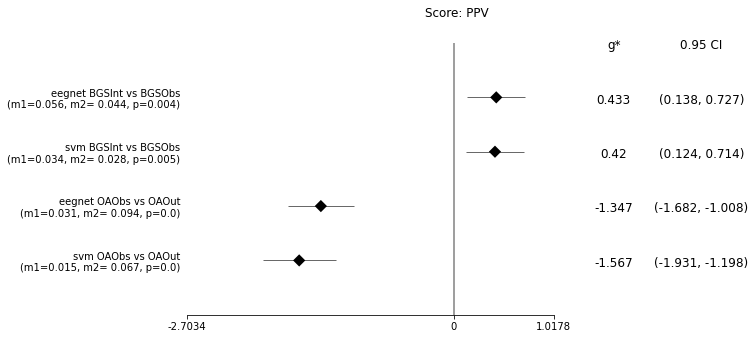

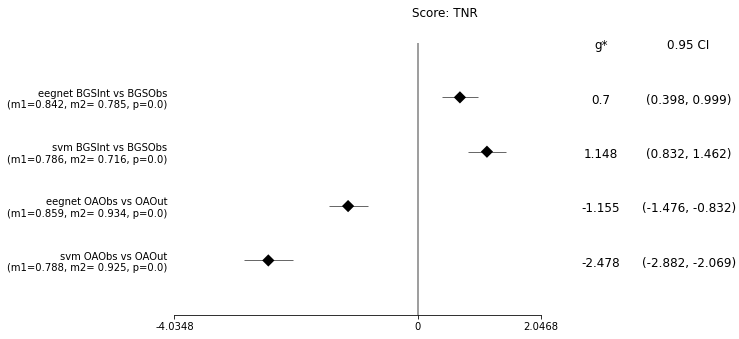

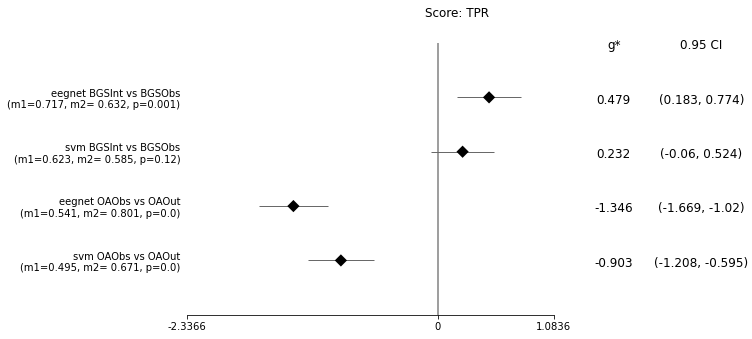

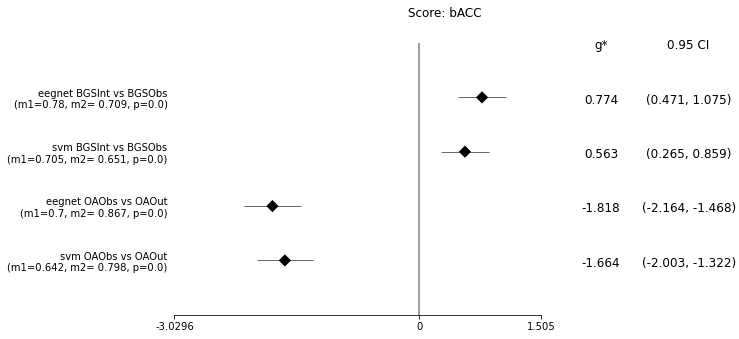

In [15]:
baseline_forest_plot(bl_anlys, save_path=bl_plots_path, file_ext='pdf');

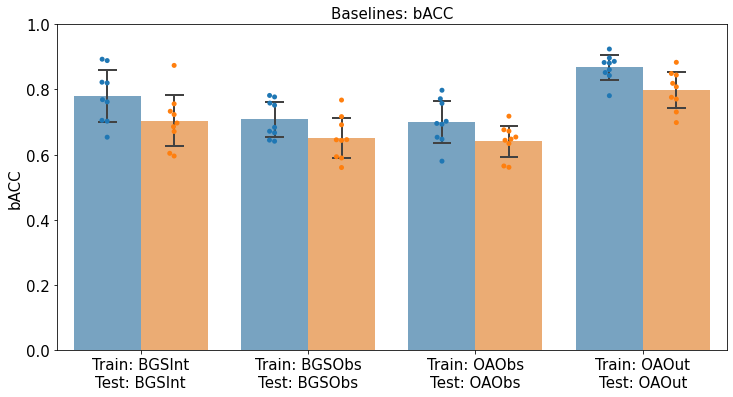

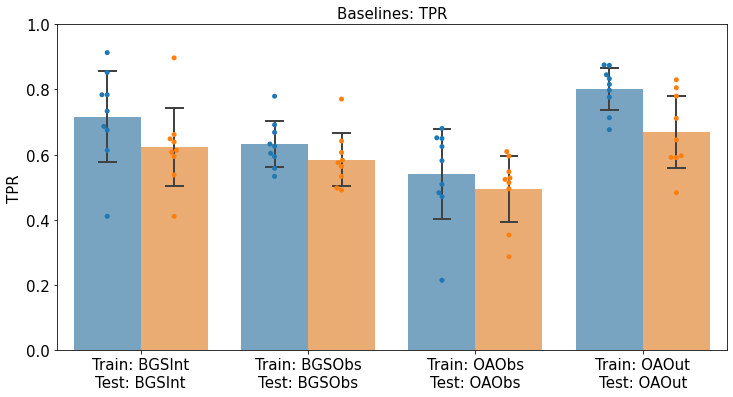

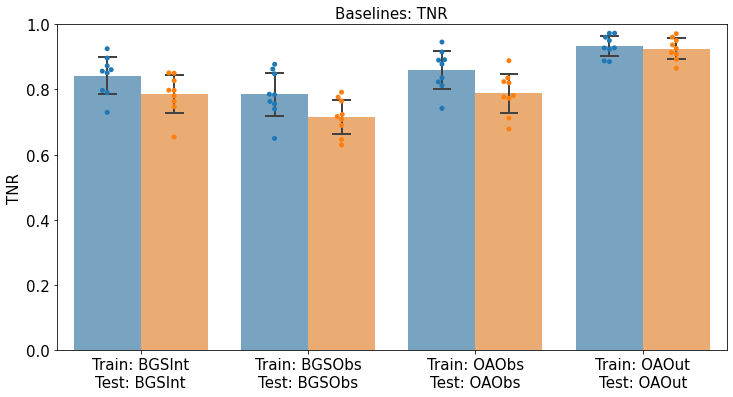

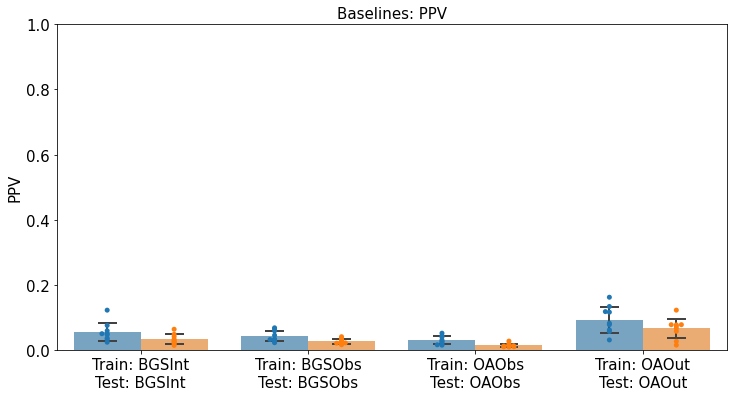

In [16]:
def get_baseline_set_locs(df, **kwargs):
    return df['tst_dataset'] == df['tar_dataset']

def baseline_title(**kwargs):
    return f"Baselines: {kwargs['dv']}"

def baseline_filename(**kwargs):
    return f"BAR_{kwargs['dv']}"

mean_bar_pot(
    exps, 
    dependent_vars=['bACC', 'TPR', 'TNR', 'PPV'],
    task_plot_vars=[None],
    loc_func=get_baseline_set_locs,
    title_func=baseline_title, # Set to None to remove title
    filename_func=baseline_filename,
    fontsize=15, # change font sizes of entire plot
    legend=False, # set to True to use legened
    use_xlabel=False, # Set to True to enable x-axis label
    file_ext='pdf', # change extension
    save_path=bl_plots_path,
)

In [17]:
save_results(bl_path, bl_anlys, prefix='bl_')

## Transfer

In [18]:
def same_forest_plot(df, same_set, save_path=None, file_ext='jpg'):
    if same_set not in ['test', 'train']:
        err = f"same_set must be set to either 'test' or 'train': recieved {same_set}"
        raise ValueError(err)
    
    def swap(x, target):
        def _swap(a, idx1, idx2):
            old  = a[idx1]
            a[idx1] = a[idx2]
            a[idx2] = old
        
        default = [x['group1'], x['group2'], x['mean1'], x['mean2'],
                   x['std1'], x['std2'], x['n1'], x['n2'],
                   x['Hedges_g'], x['CI_low'], x['CI_high'], x['diff'], 
                   x['conf.low'], x['conf.high']]

        if target in x['group2']:
            _swap(default, 0, 1)
            _swap(default, 2, 3)
            _swap(default, 4, 5)
            _swap(default, 6, 7)
            if np.sign(x['Hedges_g']) == -1:
                default[8:] = [-1*i for i in default[8:]]
        return default

    df = df.copy()
    keep_idx = 0 if same_set == 'test' else 1
    df['group1'] = df['group1'].str.split('-').str[keep_idx]
    df['group2'] = df['group2'].str.split('-').str[keep_idx]
    groups = df.groupby(['score', same_set])
    invert = ['group1', 'group2', 'mean1', 'mean2', 'std1', 'std2', 'n1', 'n2',
              'Hedges_g', 'CI_low', 'CI_high','diff', 'conf.low', 'conf.high']
    for name, gdf in groups:
        gdf = gdf.reset_index(drop=False)
        score, set_  = gdf['score'][0], gdf[same_set][0]
        new_grps = gdf.apply(swap, axis=1, target=set_, result_type='expand')
        gdf[invert] = pd.DataFrame(new_grps)

        # Set correct order
        gdf["name_order"] = 1
        name_idx = (gdf['group1'] == set_) | (gdf['group2'] == set_)
        gdf.loc[name_idx, "name_order"] = 0
        gdf = gdf.sort_values(['name_order', 'group1', 'group2',])
        
        labels = make_labels(
            df=gdf,
            tmplt="{}\n {} vs {}\n(m1={}, m2= {}, p.adj={})",
            use_columns=['exps', 'group1', 'group2', 'mean1', 'mean2', 'p.adj']
        )
        
        p, ax = forest_plot(
            labels=labels,
            measure=gdf['Hedges_g'].values,
            lcl=gdf['CI_low'].values,
            ucl=gdf['CI_high'].values,
            subtitle=f"Score: {score} {same_set.capitalize()}: {set_}",
            ci=.95,
            measure_label='g*',
            table_adjust=0.04,
            figsize=(10,10)
        )
        ax.axhline(5.5, 0, 1)
        
        if save_path is not None:
            filename = f"FOREST_{score}-{set_}" + f'.{file_ext}'
            filepath = os.path.join(save_path, filename)
            plt.savefig(filepath, bbox_inches='tight')


### Same Test

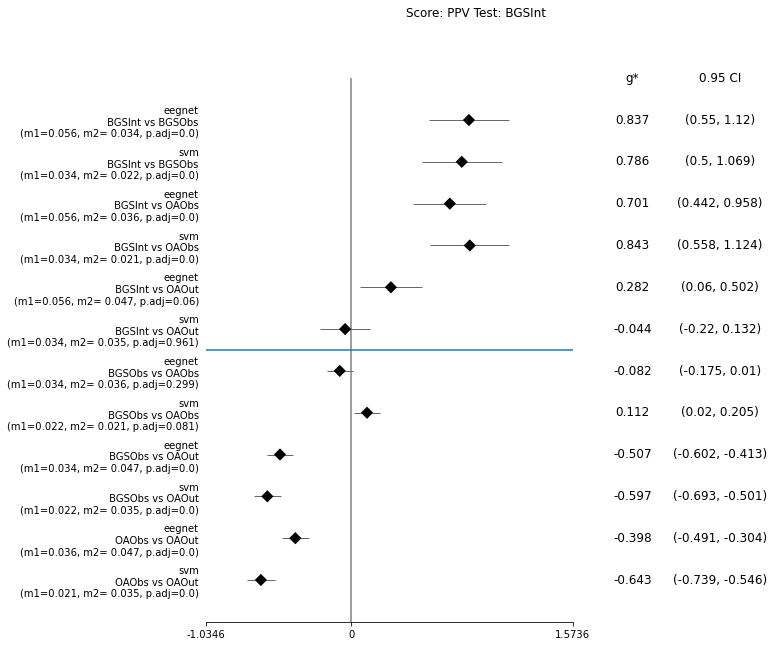

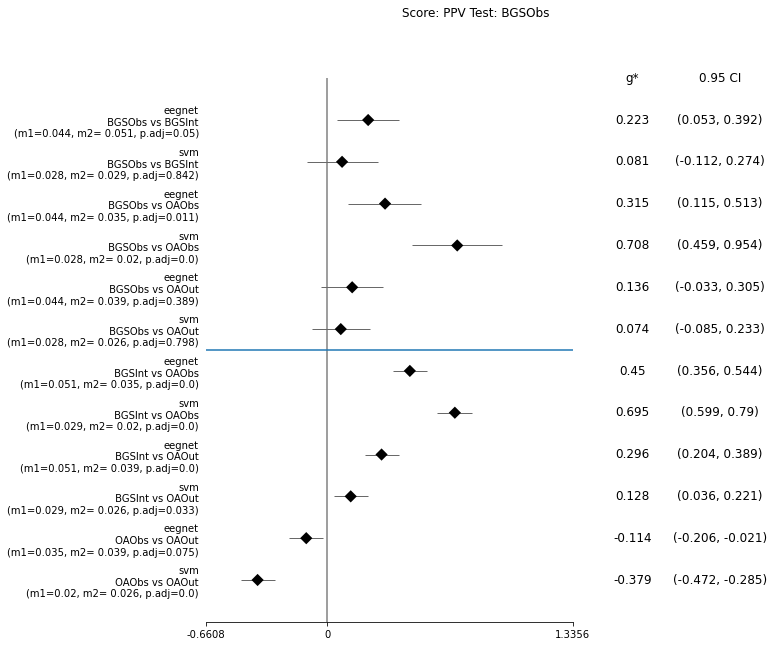

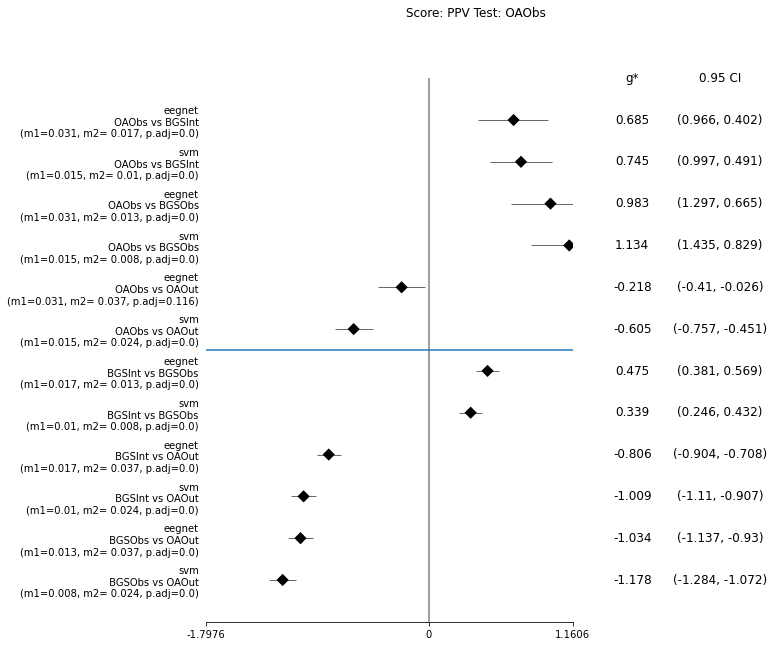

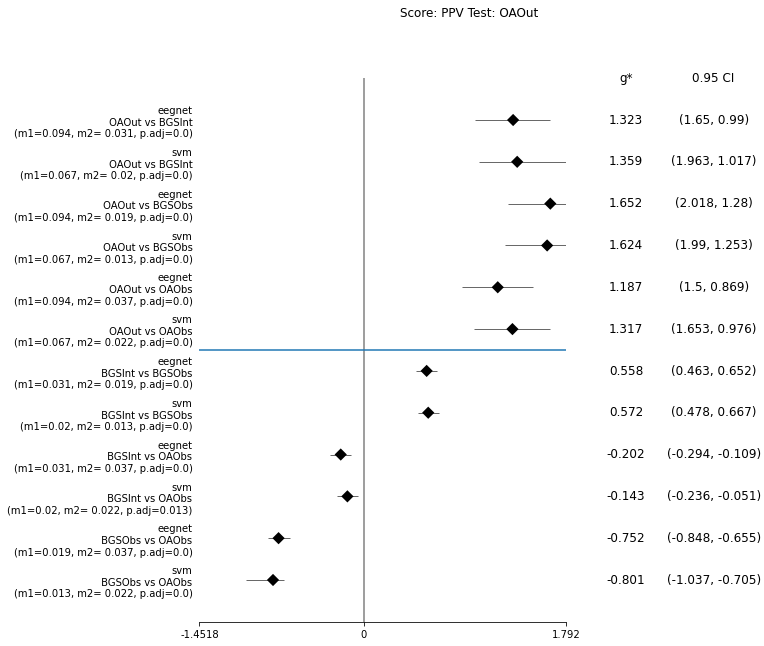

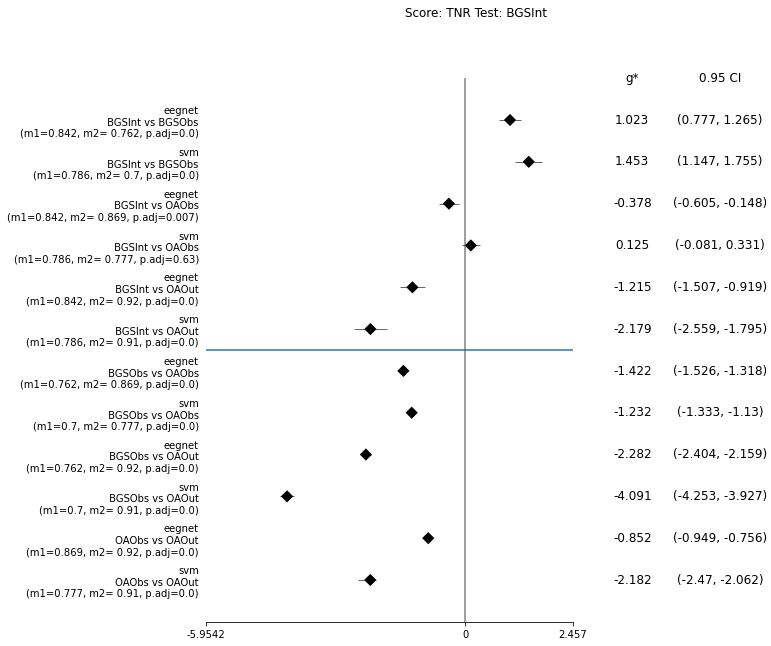

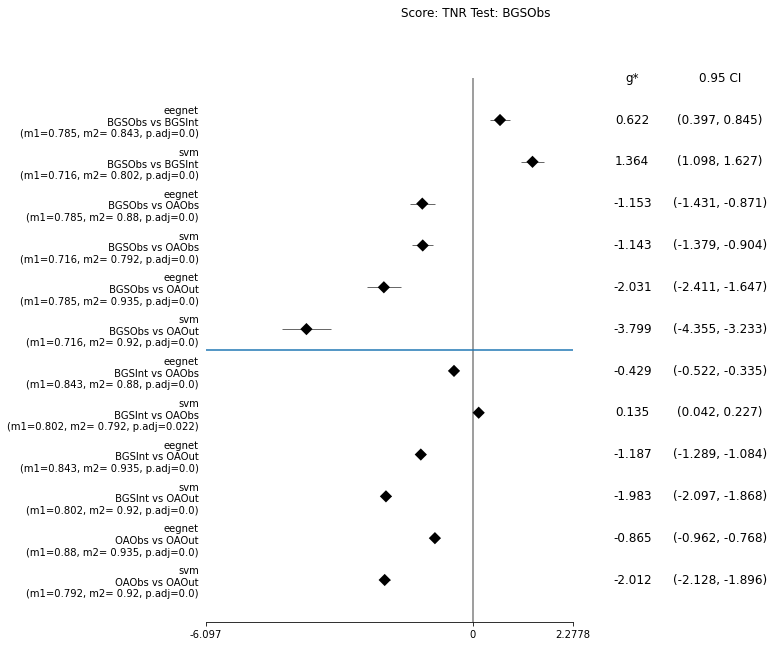

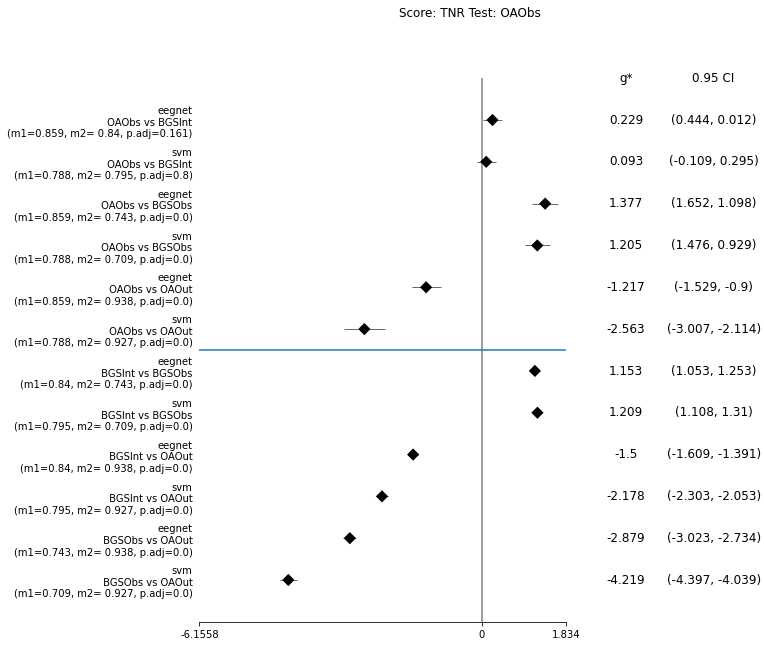

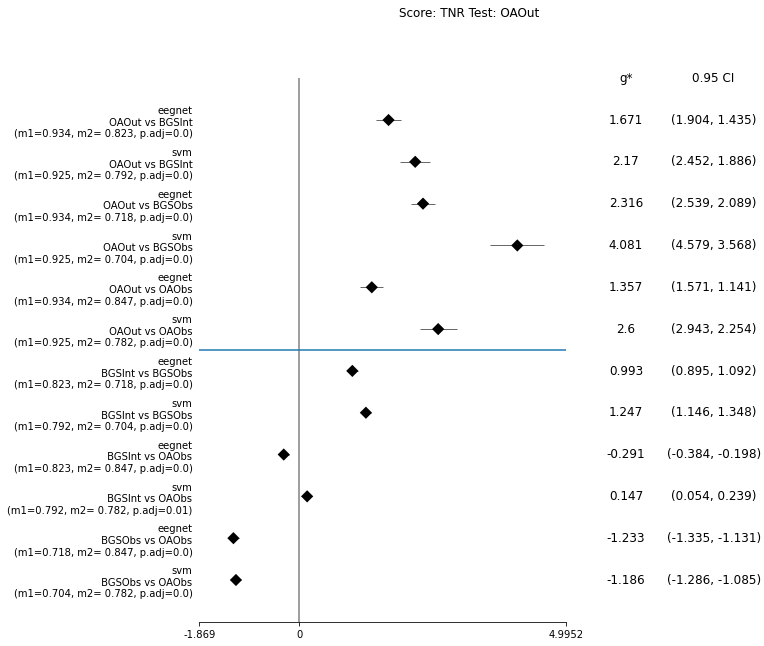

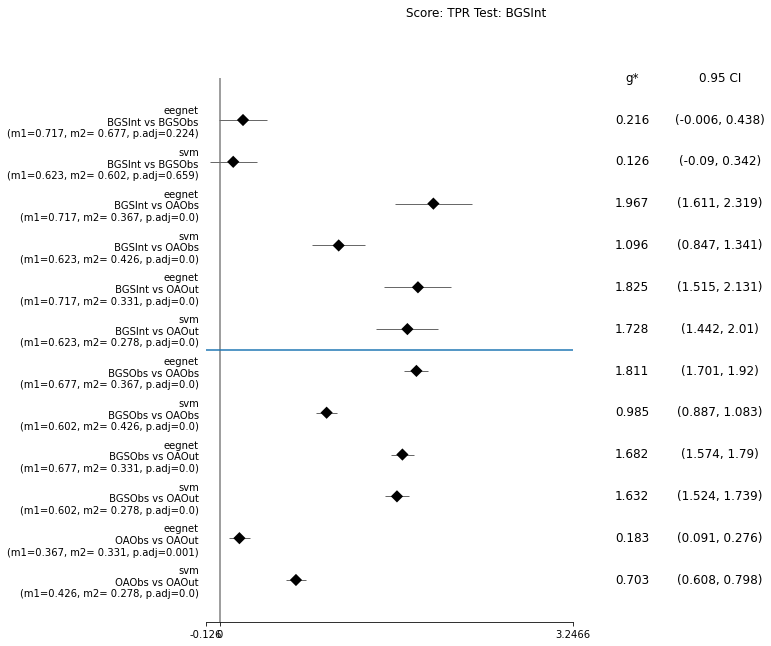

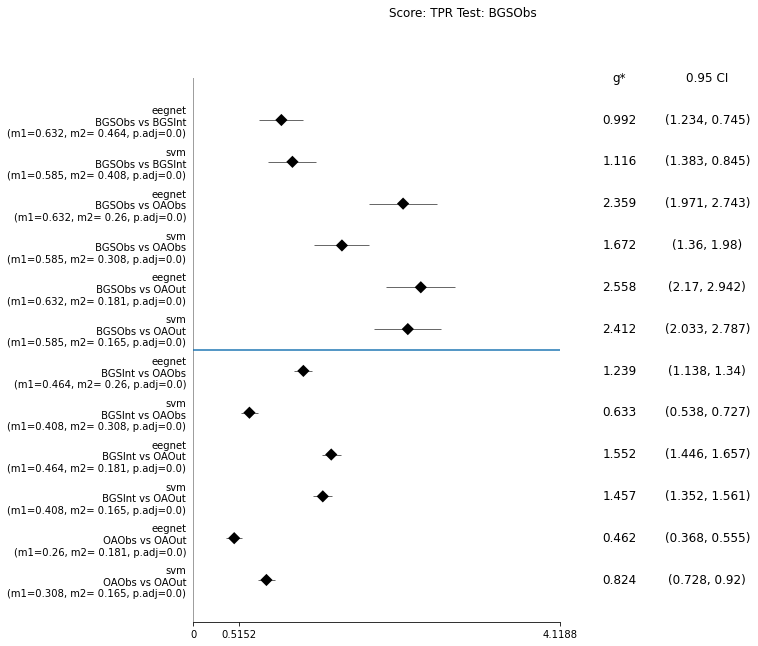

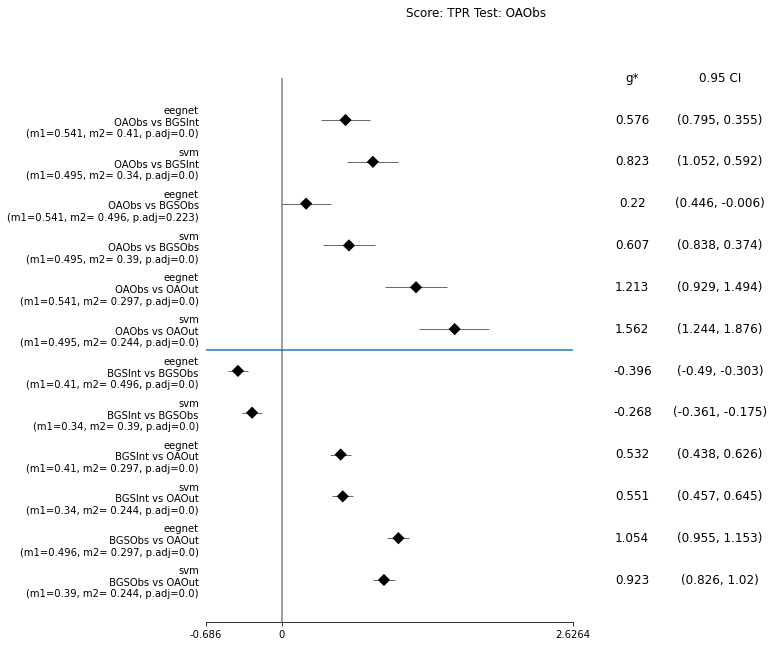

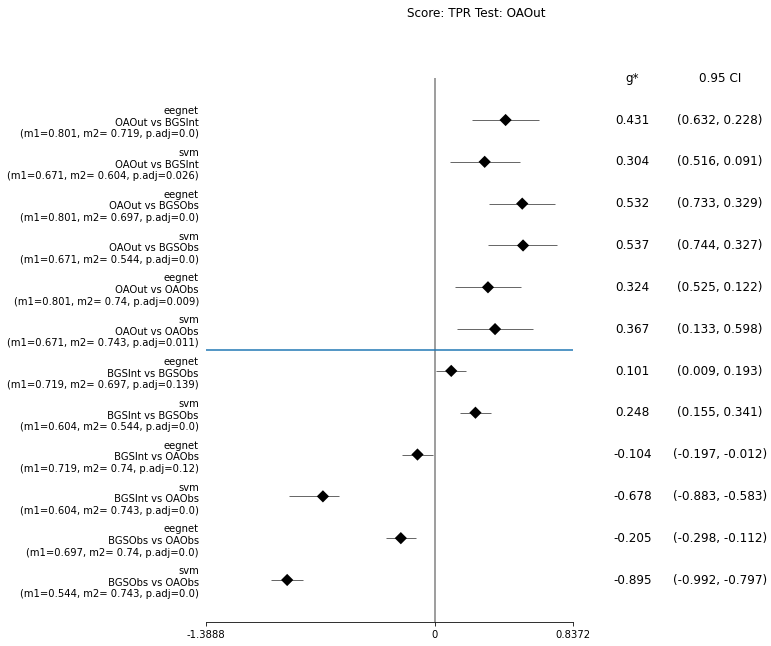

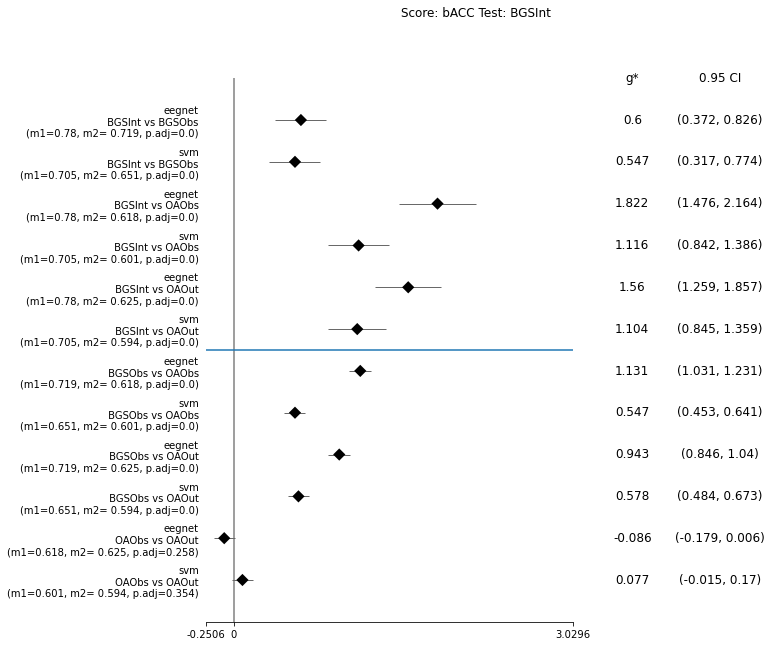

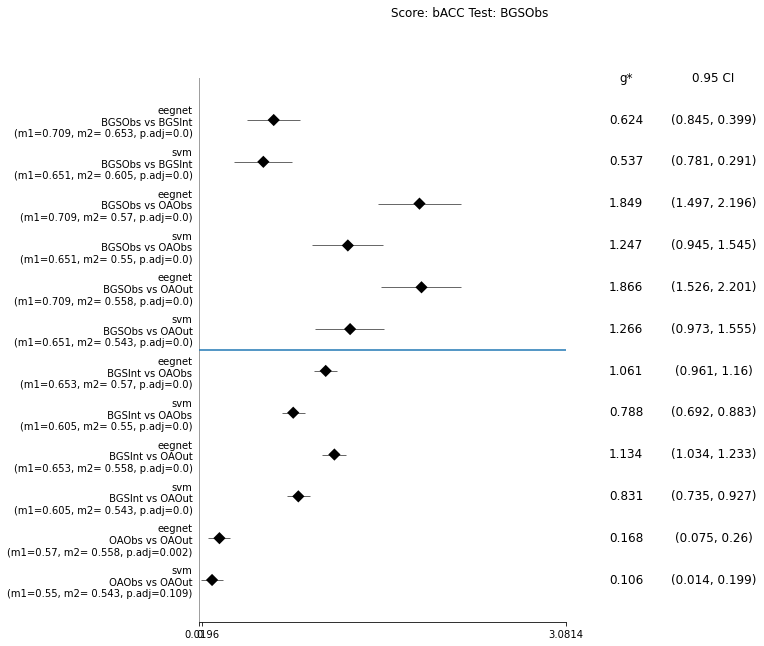

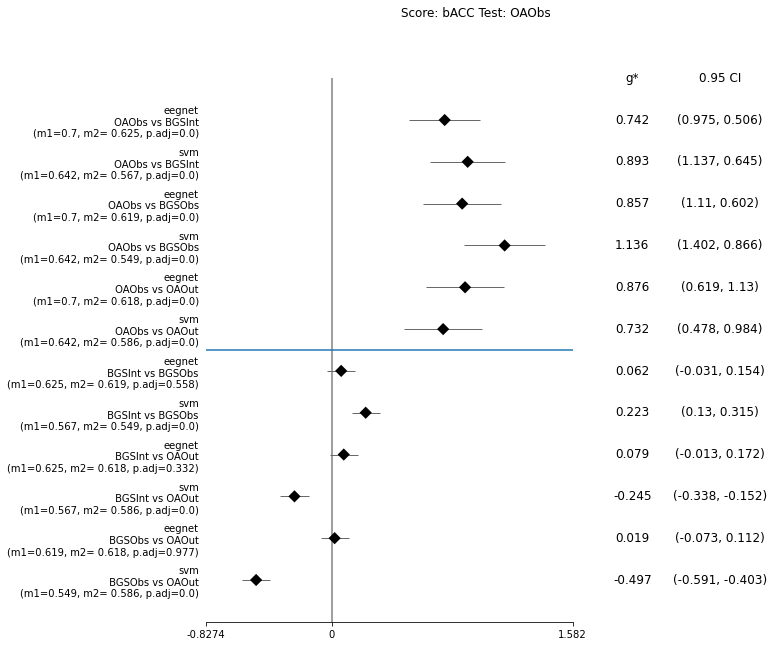

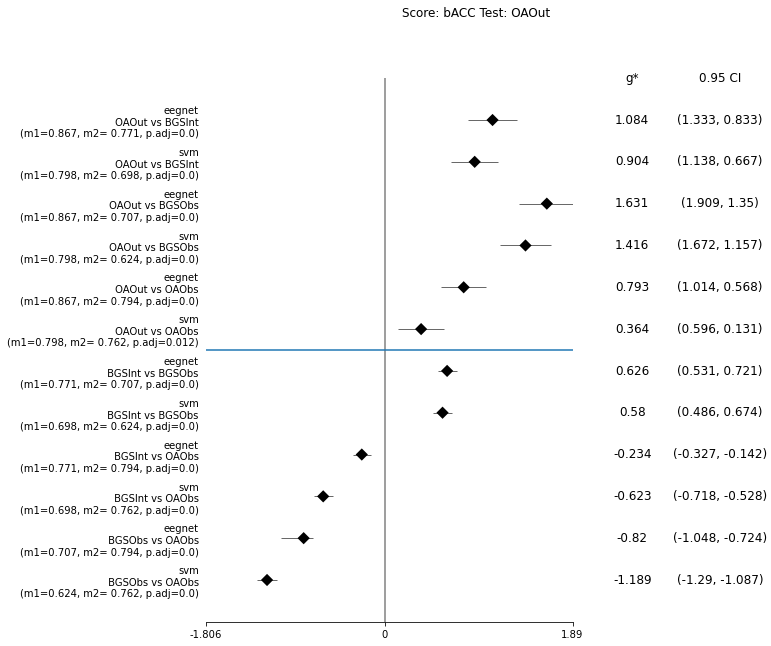

In [19]:
same_forest_plot(stst_anlys, same_set='test', save_path=stst_plots_path, file_ext='pdf');

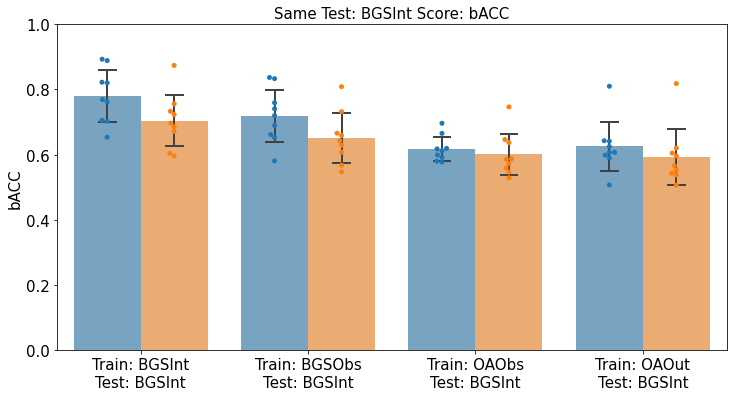

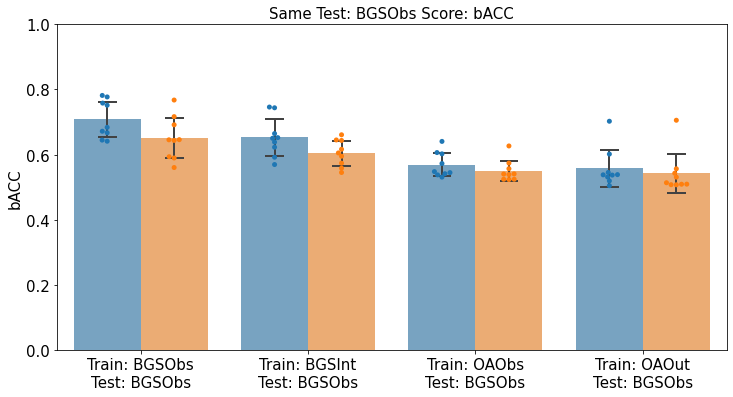

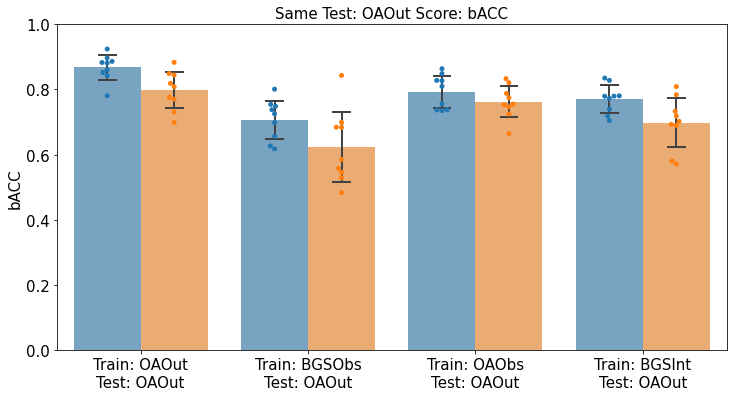

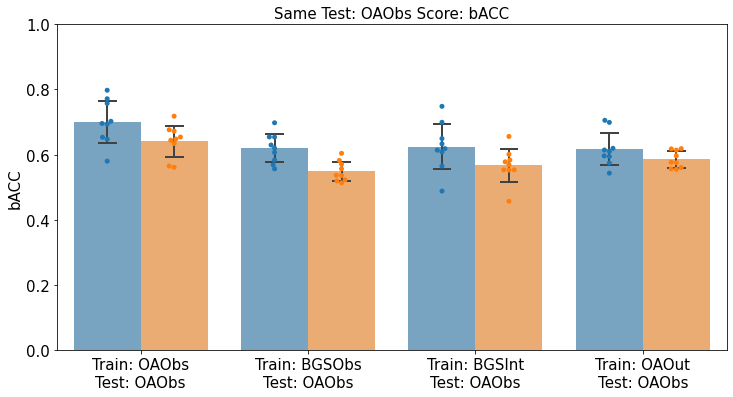

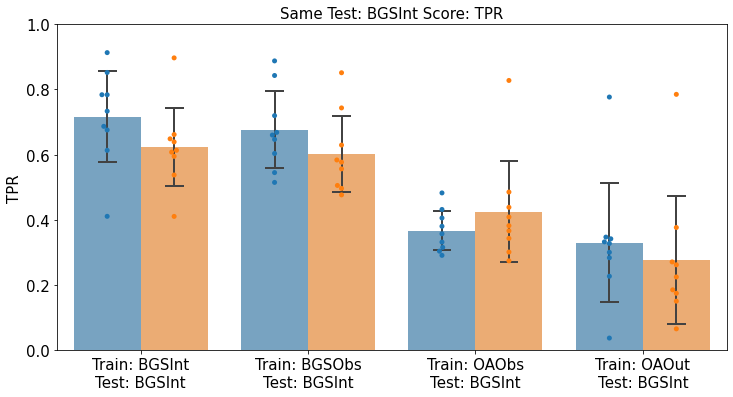

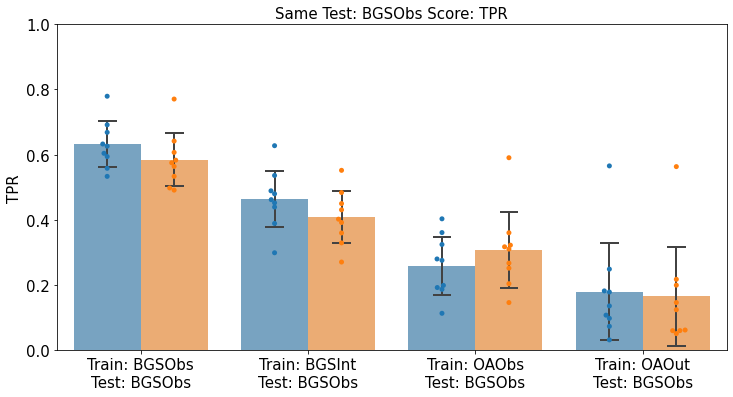

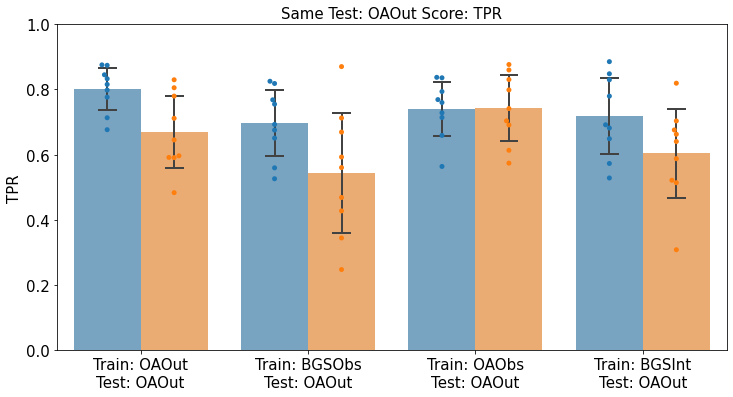

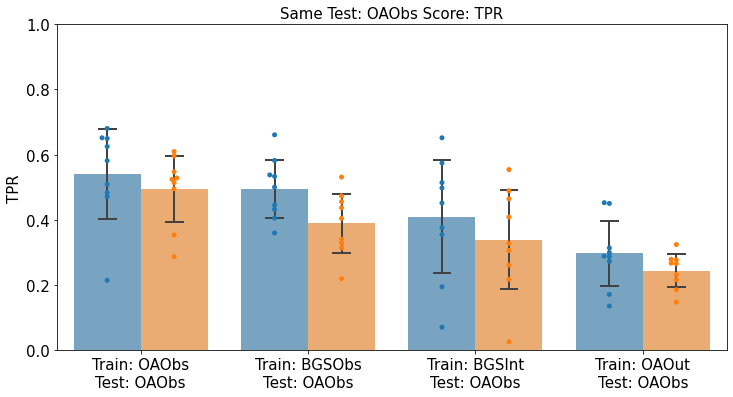

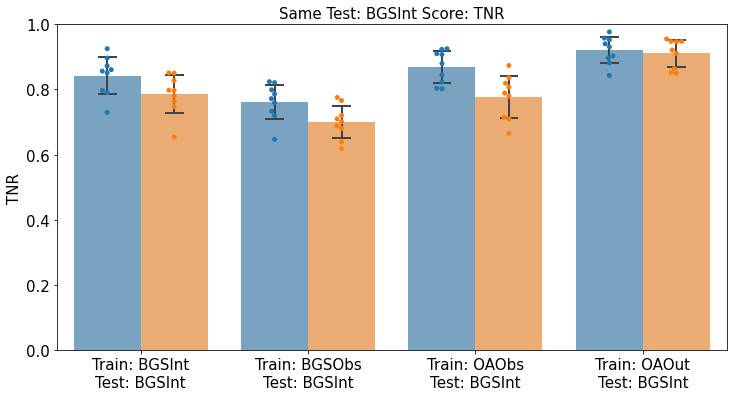

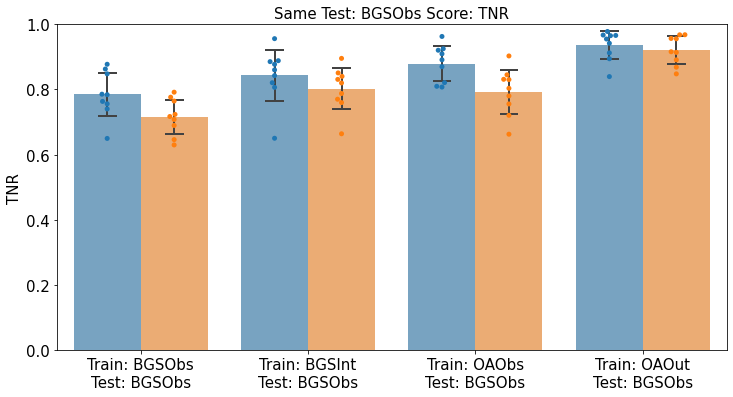

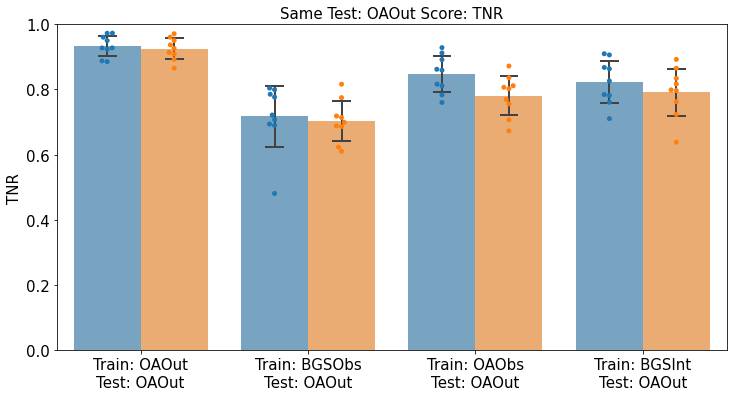

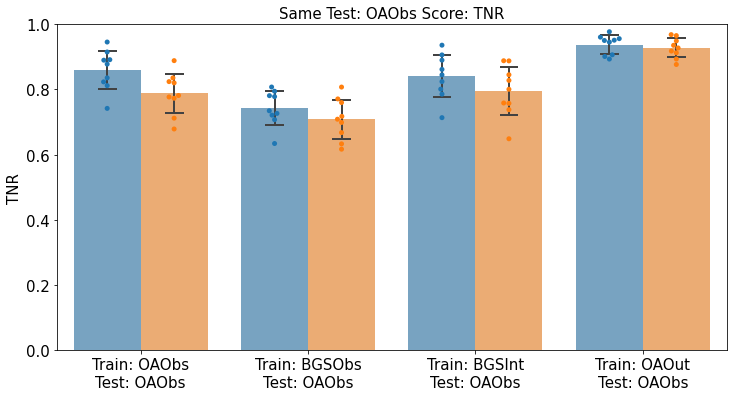

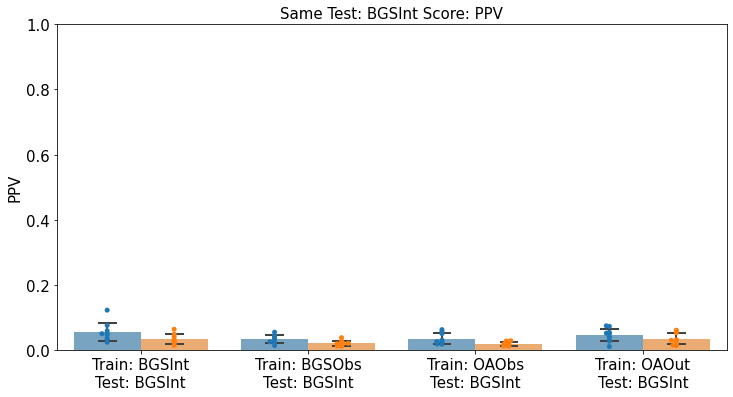

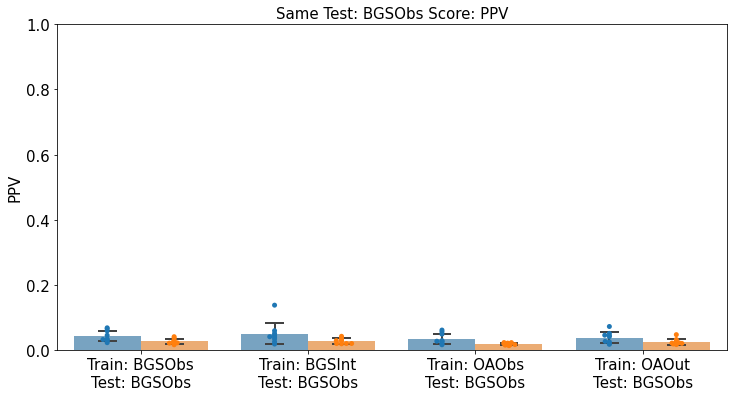

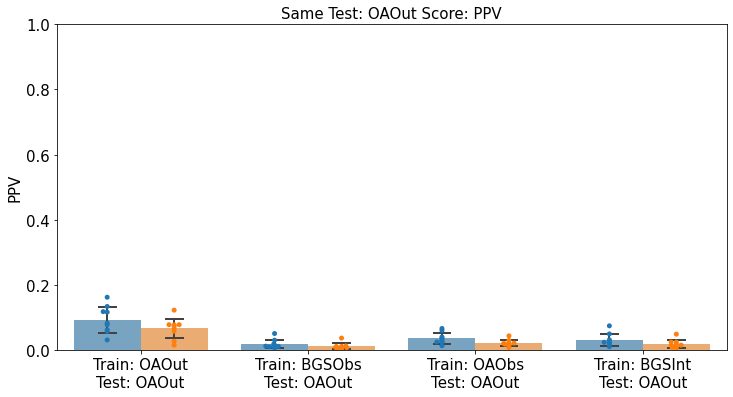

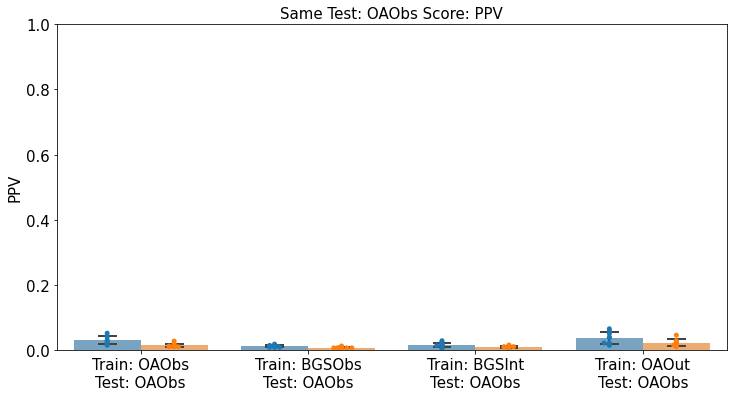

In [20]:
def same_train_test_filename(**kwargs):
    return f"BAR_{kwargs['dv']}-{kwargs['task']}"

def same_train_test_title(**kwargs):
    return f"Same {kwargs['same_set'].capitalize()}: {kwargs['task']} Score: {kwargs['dv']}"

def get_same_set_locs(same_set):
    
    def get_same_set_locs(df, column_name, **kwargs):
        return df[column_name] == kwargs['task']
    
    if same_set.lower() == 'test':
        target_col = 'tar_dataset'
    elif same_set.lower() == 'train':
        target_col = 'tst_dataset'
    else:
        err = f"same_set must be set to either 'test' or 'train': received {same_set}"
        raise ValueError(err)
    
    return partial(get_same_set_locs, column_name=target_col)

def source_task_first(df):
    values = df['group'].unique()
    for i, v in enumerate(values):
        source, target = v.split('-')
        if source == target:
            old = values[0]
            values[0] = v
            values[i] = old
            break
    return values

same_set = 'test'
mean_bar_pot(
    exps, 
    dependent_vars=['bACC', 'TPR', 'TNR', 'PPV'],
    task_plot_vars=['BGSInt','BGSObs','OAOut','OAObs'],
    loc_func=get_same_set_locs(same_set=same_set),
    title_func=partial(same_train_test_title, same_set=same_set), # set this to none to remove title
    filename_func=same_train_test_filename,
    order_func=source_task_first,
    fontsize=15, # change font sizes of entire plot
    legend=False, # set to True to use legened
    use_xlabel=False, # Set to True to enable x-axis label
    file_ext='pdf', # change extension
    save_path=stst_plots_path,
)

In [21]:
stst_path = os.path.join(analysis_path, 'same_test')
save_results(stst_path, stst_anlys, prefix='stst_')

### Same Train

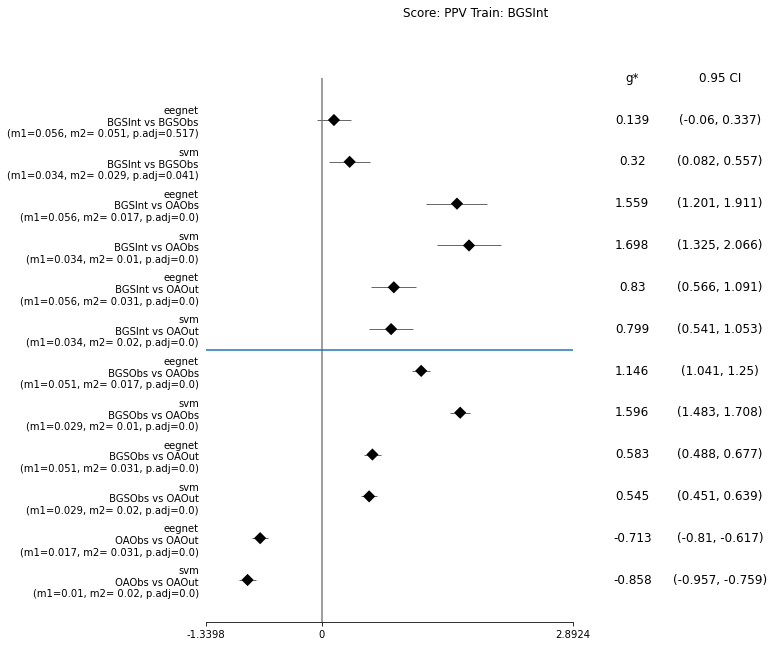

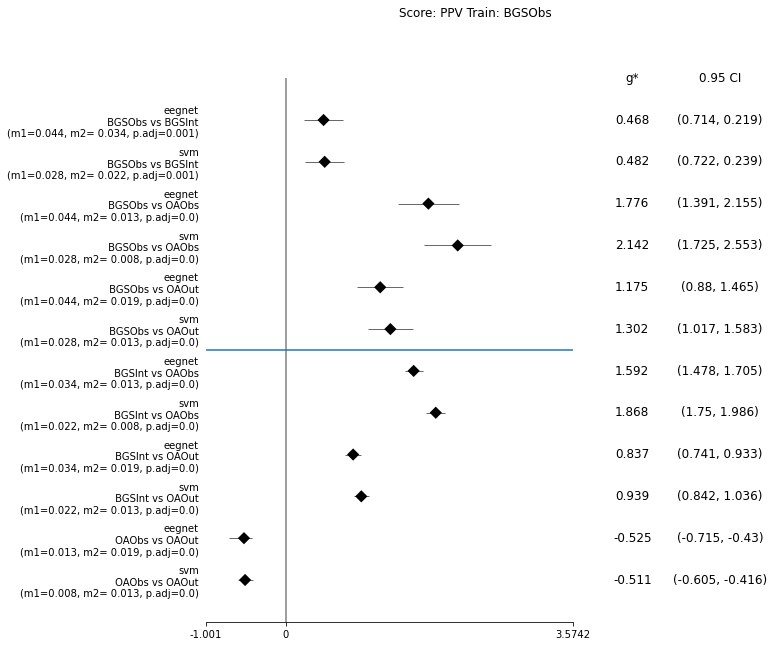

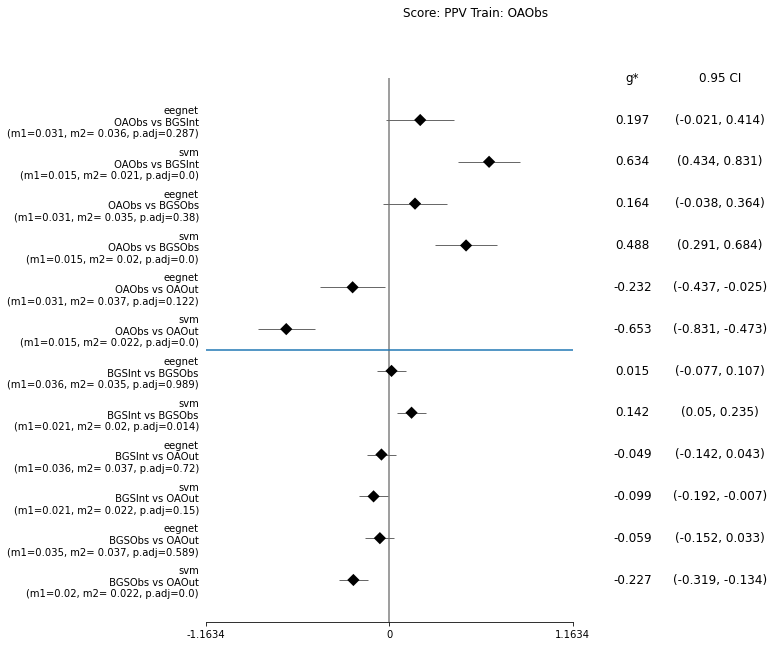

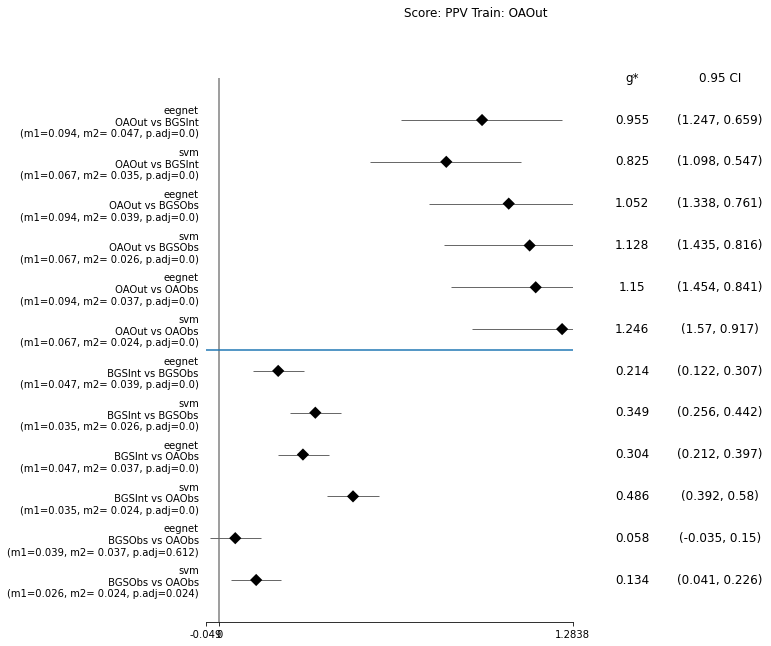

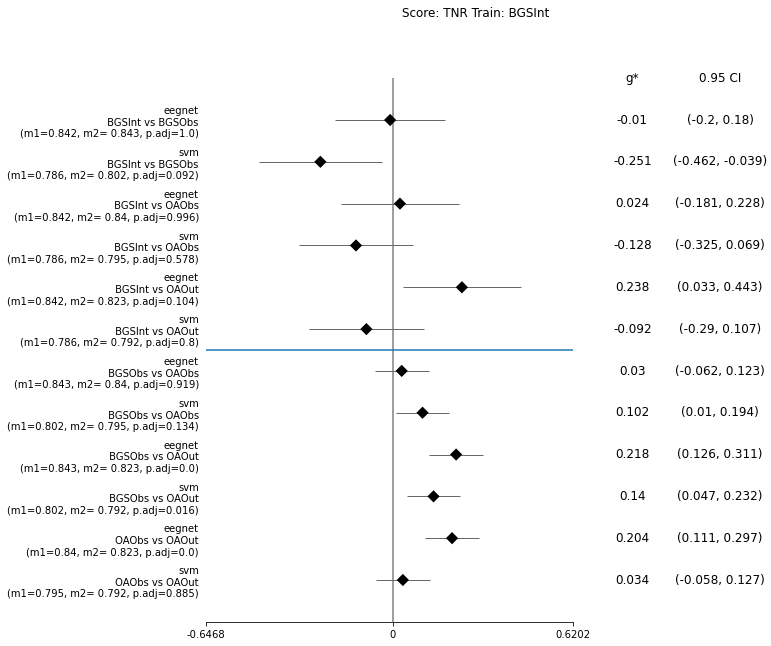

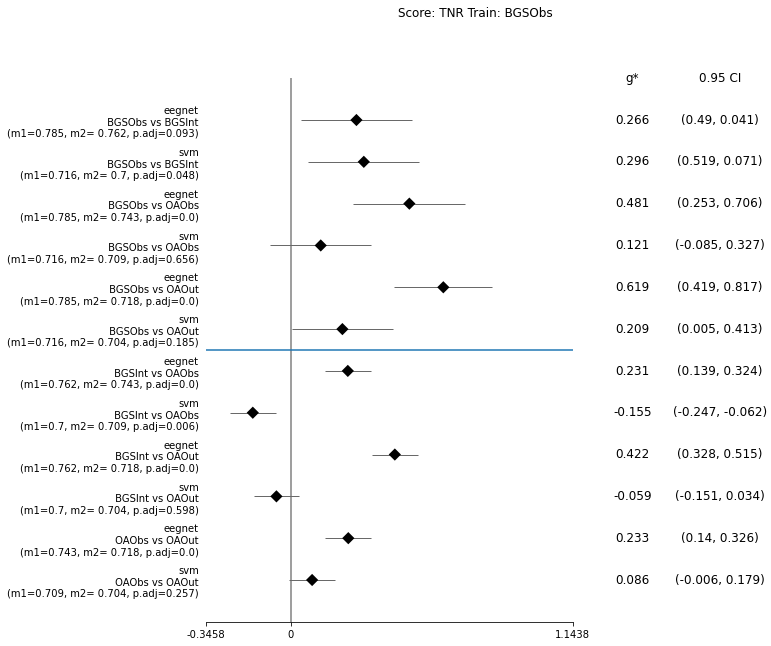

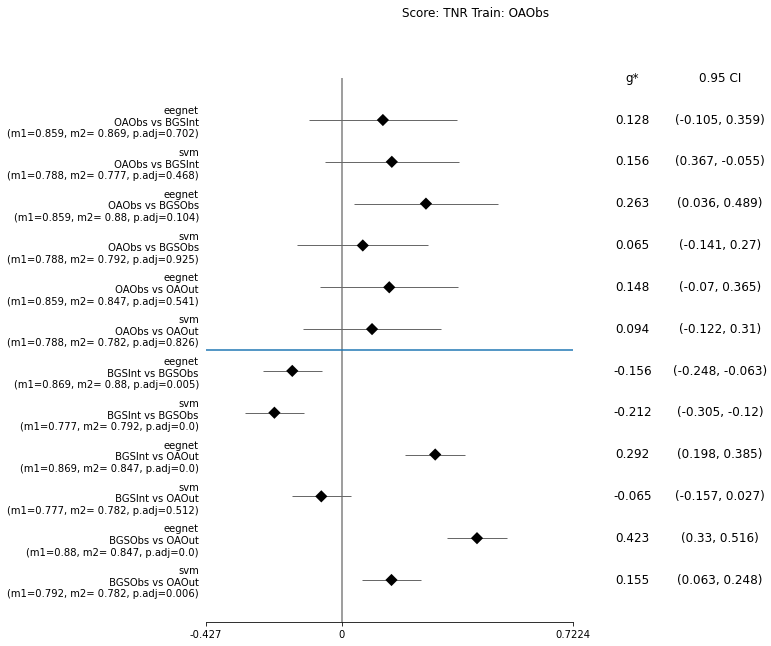

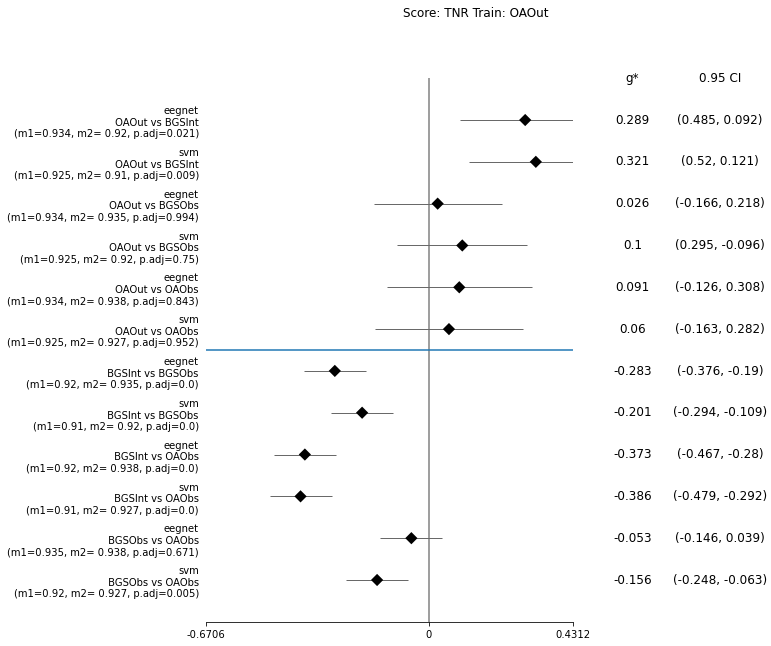

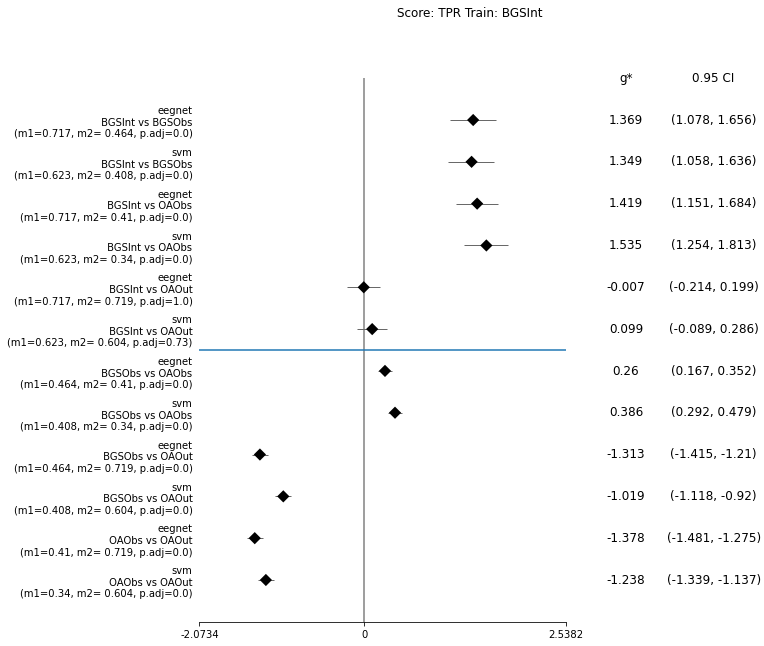

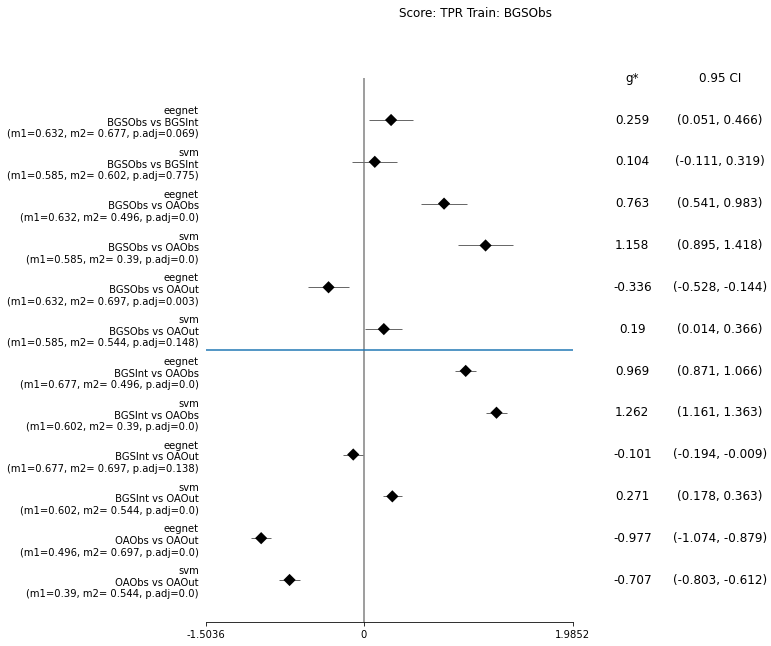

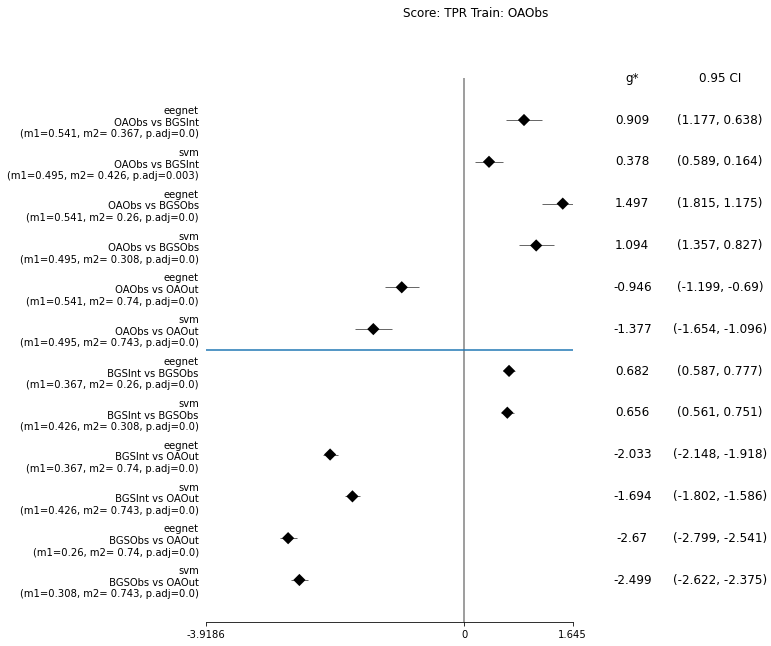

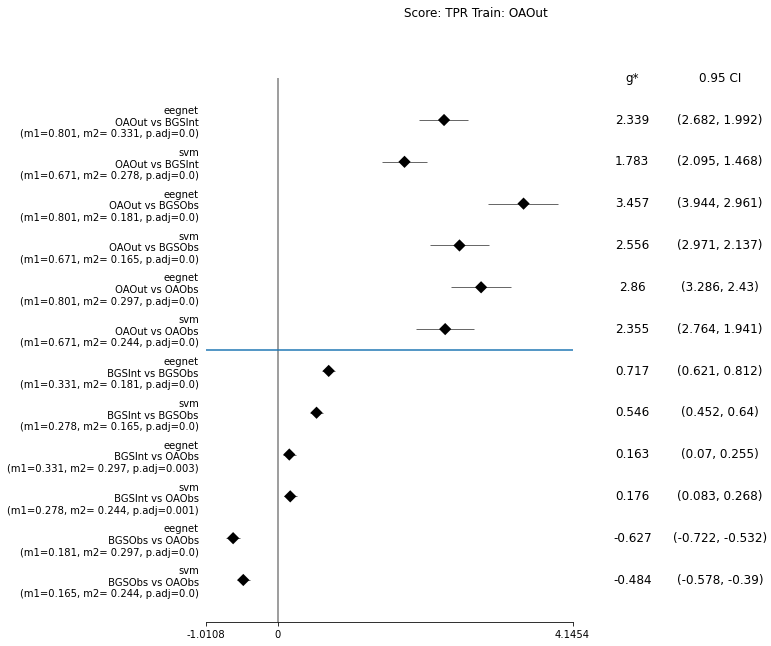

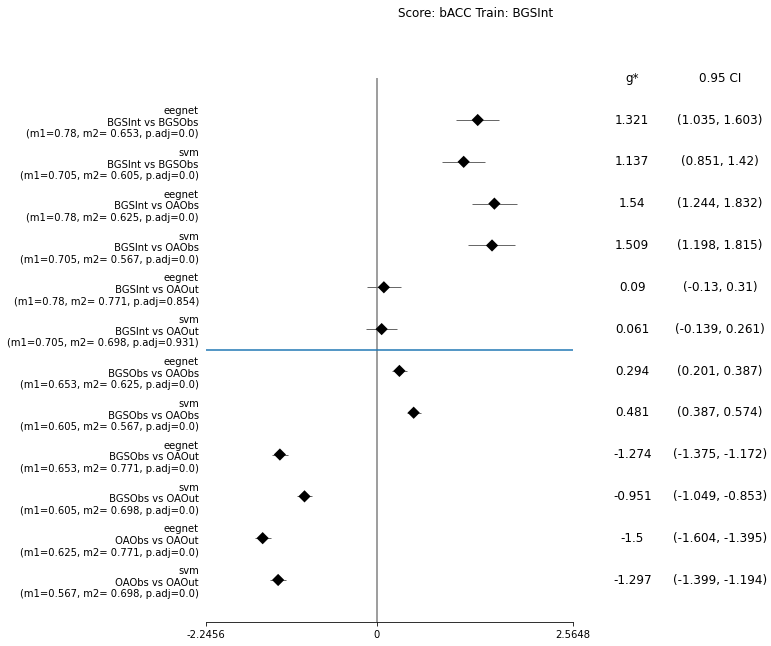

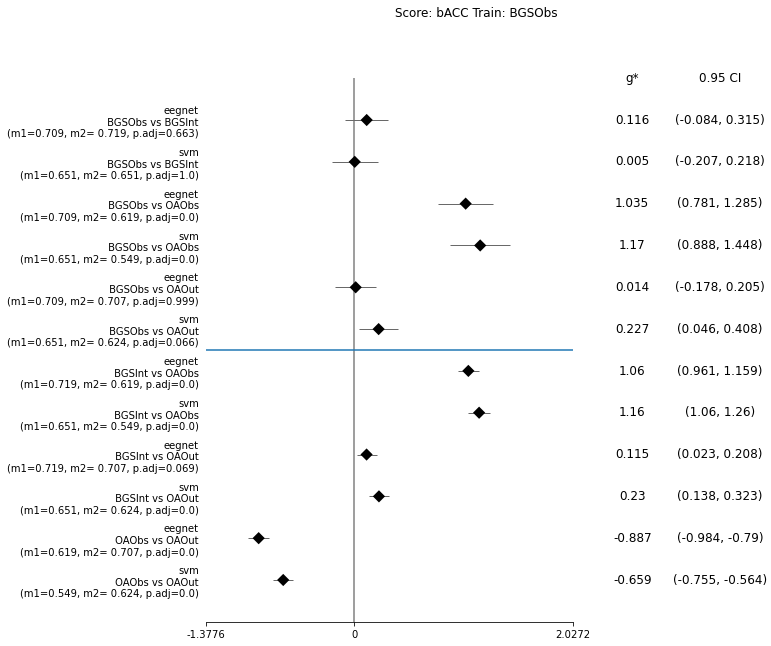

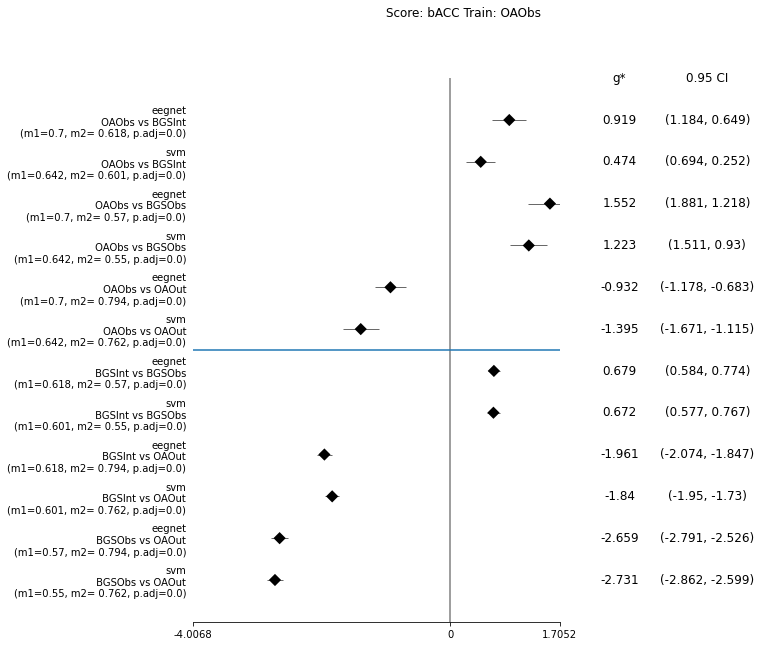

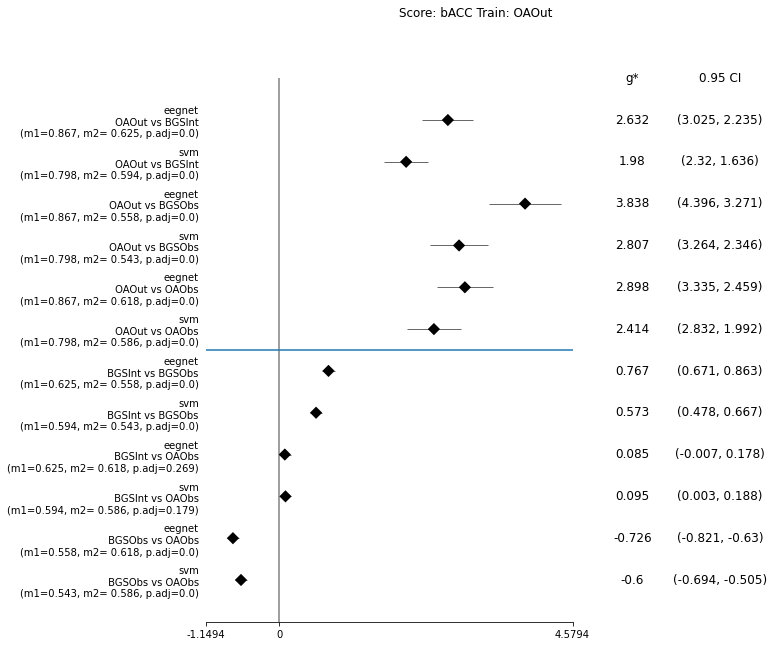

In [22]:
same_forest_plot(strn_anlys, same_set='train', save_path=strn_plots_path, file_ext='pdf');

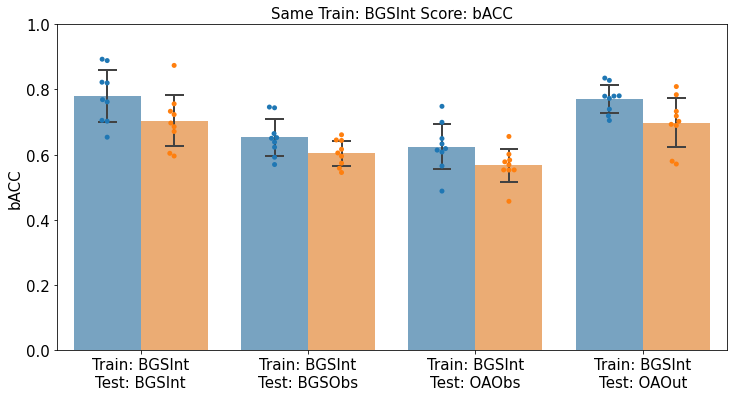

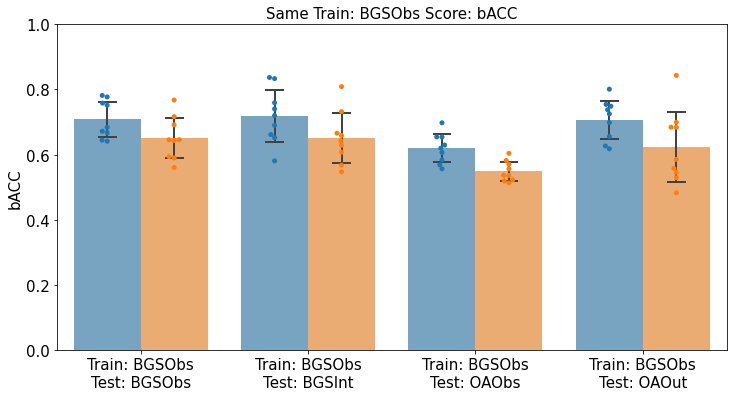

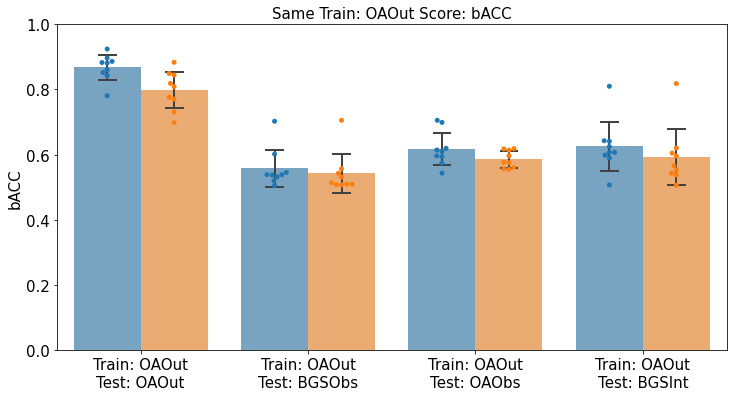

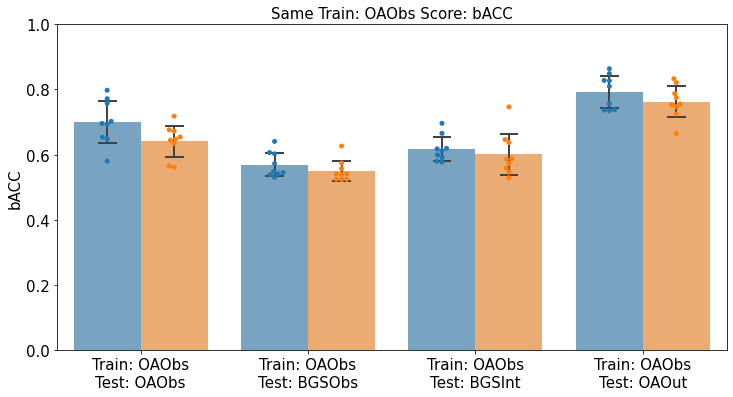

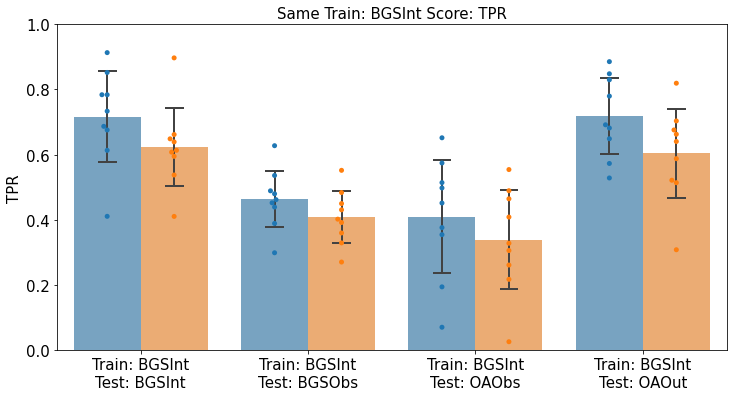

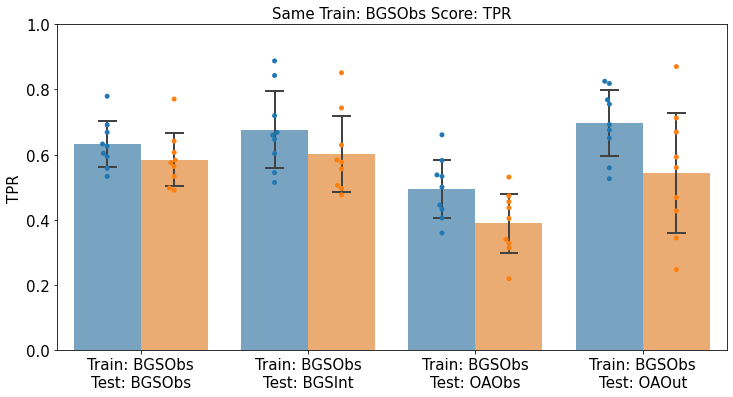

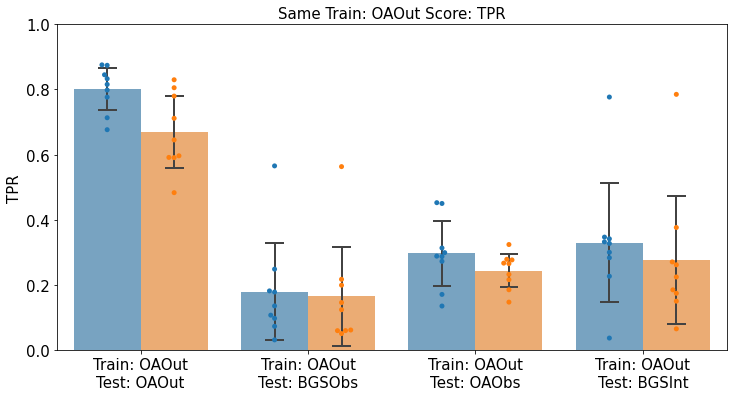

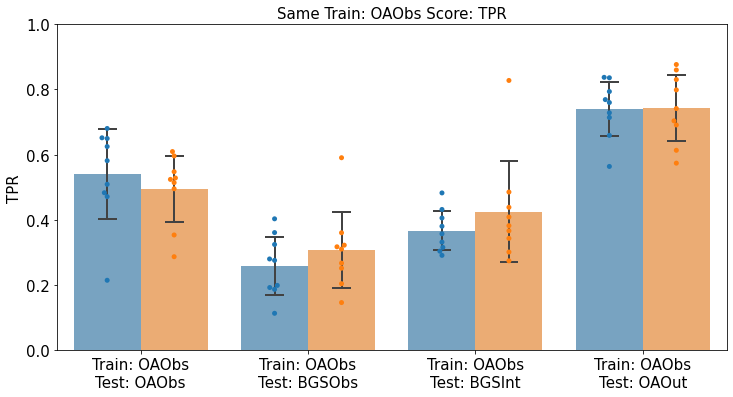

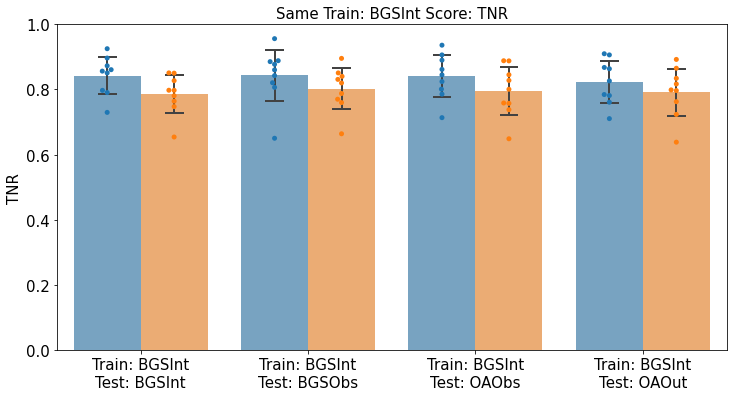

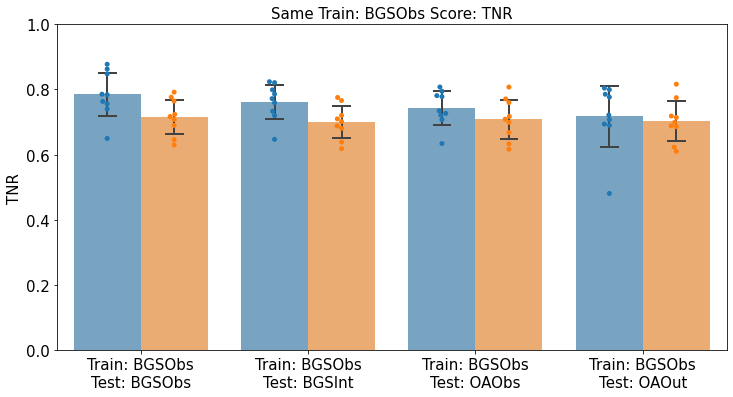

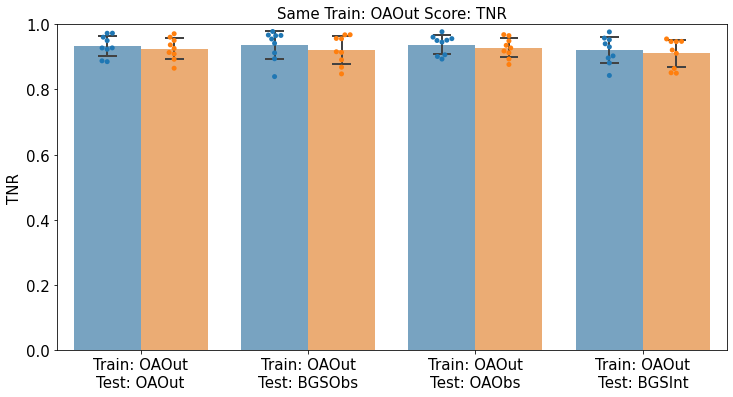

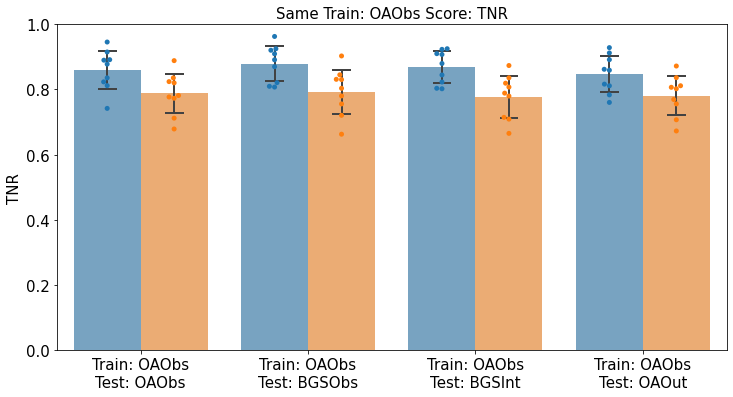

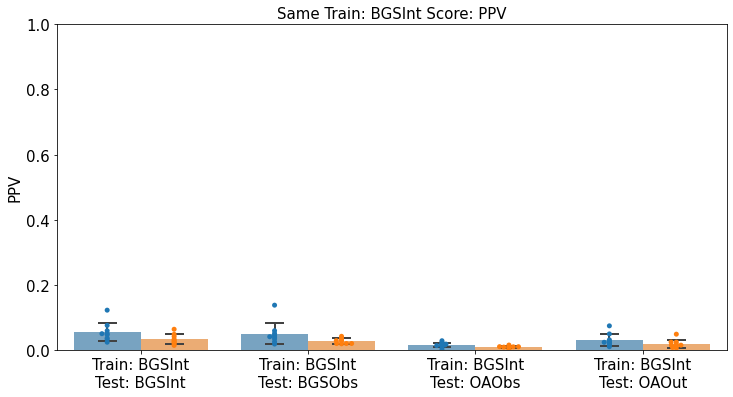

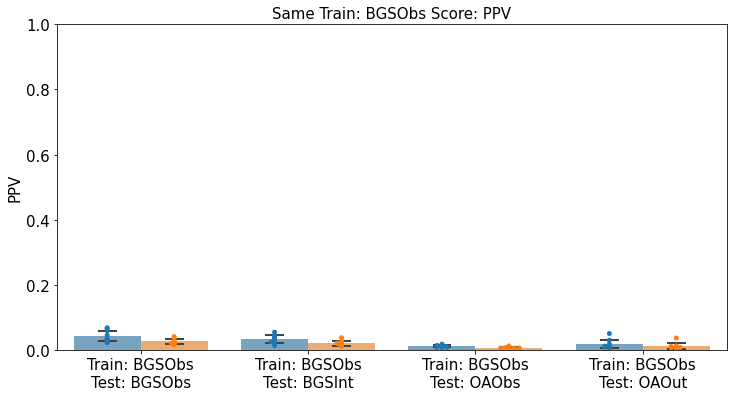

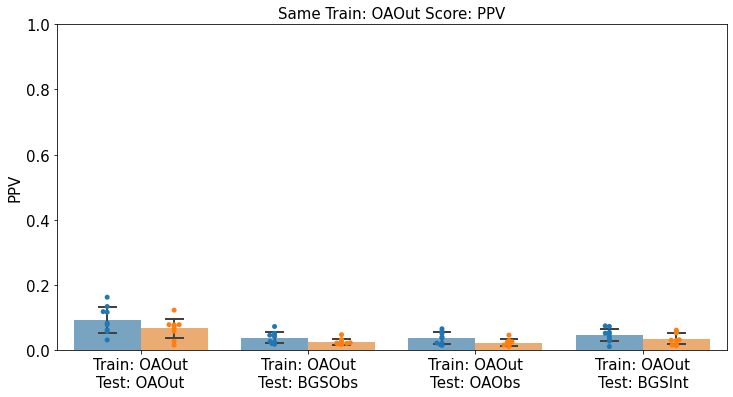

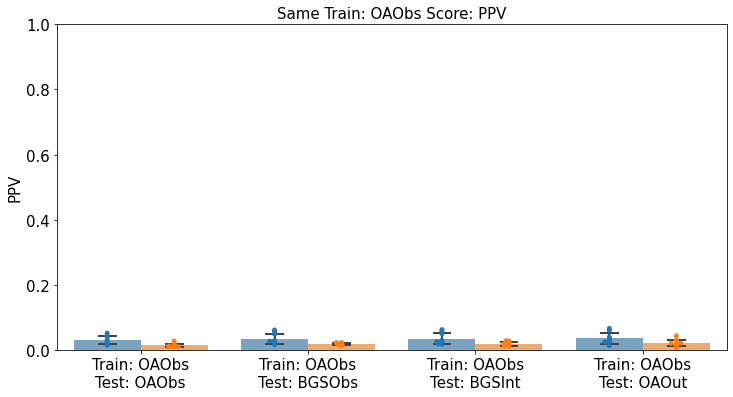

In [23]:
same_set = 'train'
mean_bar_pot(
    exps, 
    dependent_vars=['bACC', 'TPR', 'TNR', 'PPV'],
    task_plot_vars=['BGSInt','BGSObs','OAOut','OAObs'],
    loc_func=get_same_set_locs(same_set=same_set),
    title_func=partial(same_train_test_title, same_set=same_set), # set this to none to remove title
    filename_func=same_train_test_filename,
    order_func=source_task_first,
    fontsize=15, # change font sizes of entire plot
    legend=False, # set to True to use legened
    use_xlabel=False, # Set to True to enable x-axis label
    file_ext='pdf', # change extension
    save_path=strn_plots_path,
)

In [24]:
save_results(strn_path, strn_anlys, prefix='strn_')

### Same Task

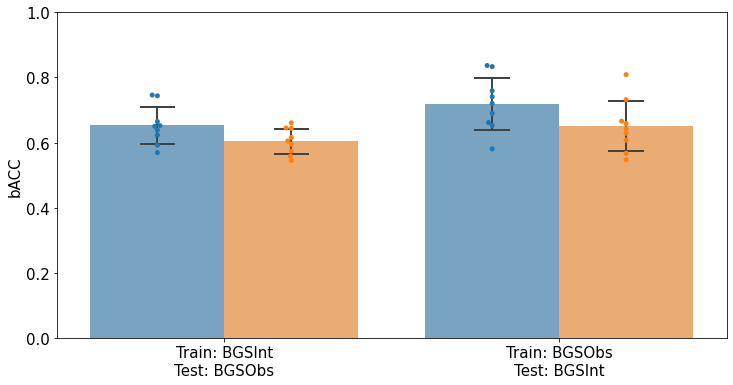

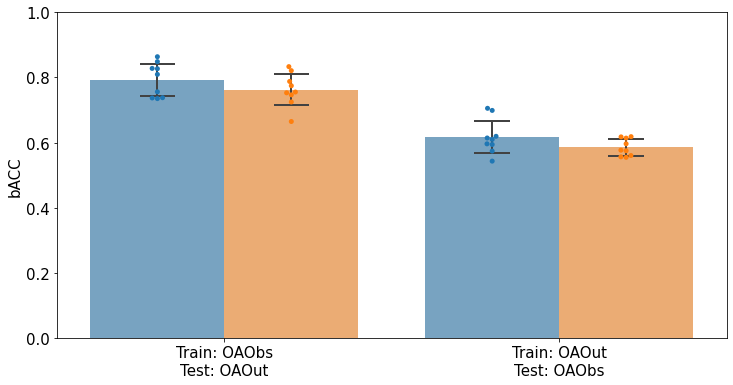

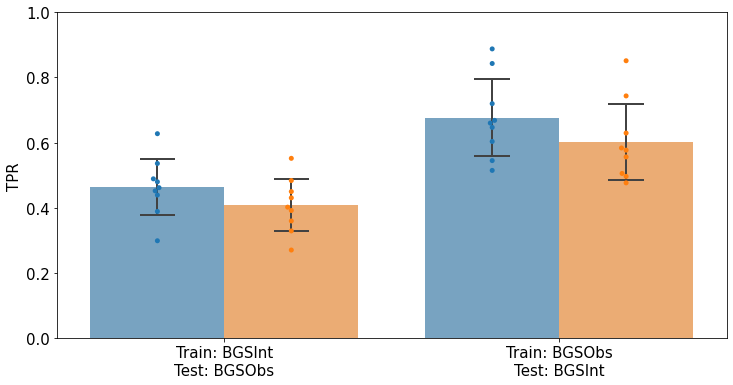

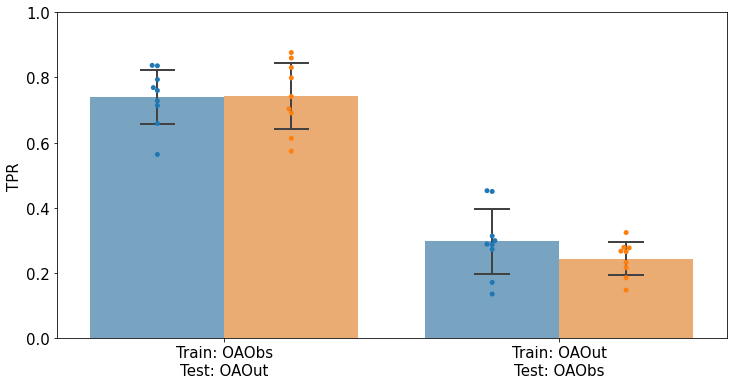

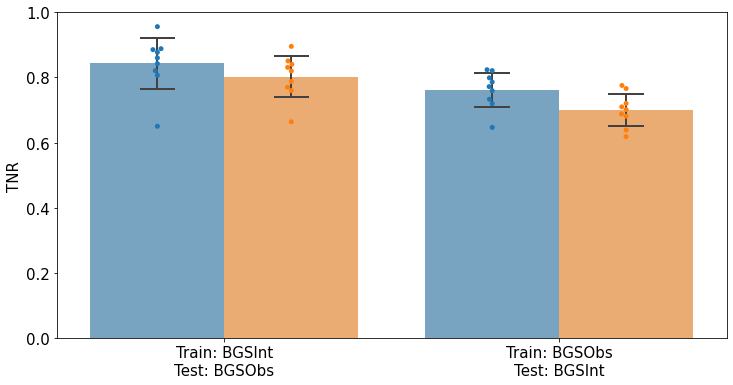

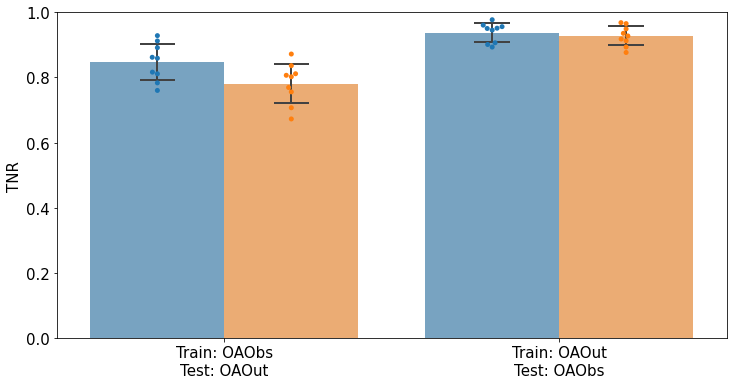

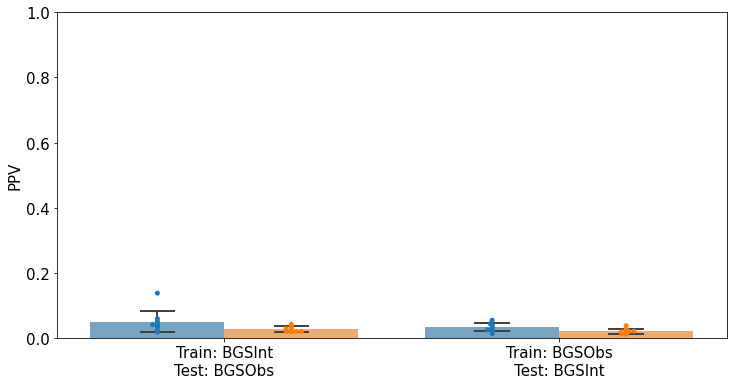

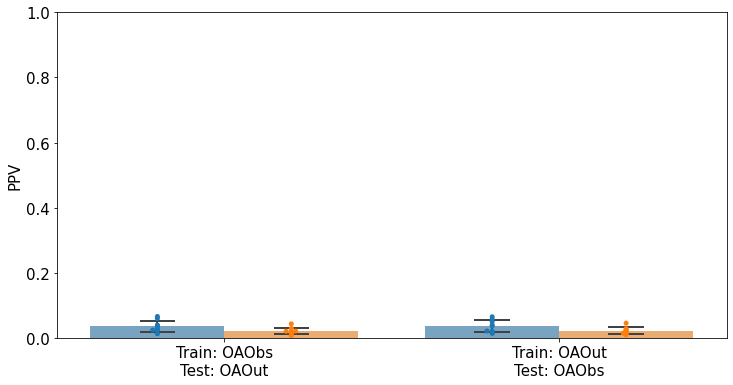

In [25]:
def get_same_task_set_locs(df, **kwargs):
    task = kwargs['task']
    condi1 = (df['tst_dataset'] == task[0]) & (df['tar_dataset'] == task[1]) 
    condi2 = (df['tst_dataset'] == task[1]) & (df['tar_dataset'] == task[0]) 
    condi = condi1 | condi2 
    return condi

def same_task_title(**kwargs):
    return f"Same Task: {' '.join(kwargs['task'])} - Score:{kwargs['dv']}"

def same_task_filename(**kwargs):
    return f"BAR_{'-'.join(kwargs['task'])}_{kwargs['dv']}"

mean_bar_pot(
    exps, 
    dependent_vars=['bACC', 'TPR', 'TNR', 'PPV'],
    task_plot_vars=[('BGSObs', 'BGSInt'), ('OAObs', 'OAOut')],
    loc_func=get_same_task_set_locs,
    title_func=None, # set this to same_task_title to add title
    filename_func=same_task_filename,
    fontsize=15, # change font sizes of entire plot
    legend=False, # set to True to use legened
    use_xlabel=False, # Set to True to enable x-axis label
    file_ext='pdf', # change extension
    save_path=stask_plots_path,
)

In [26]:
save_results(stask_path, stask_anlys, prefix='stask_')

### Same Sub-Task

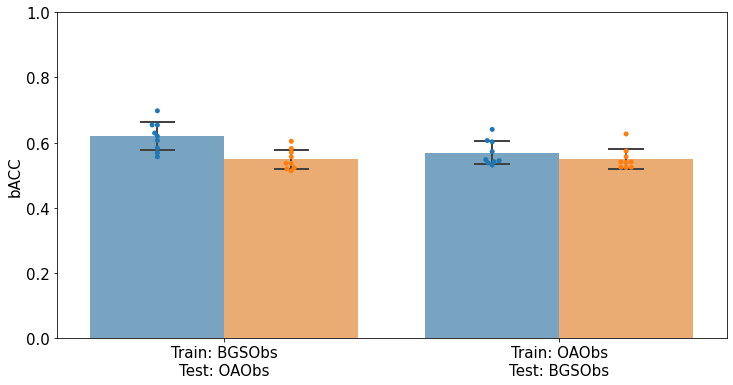

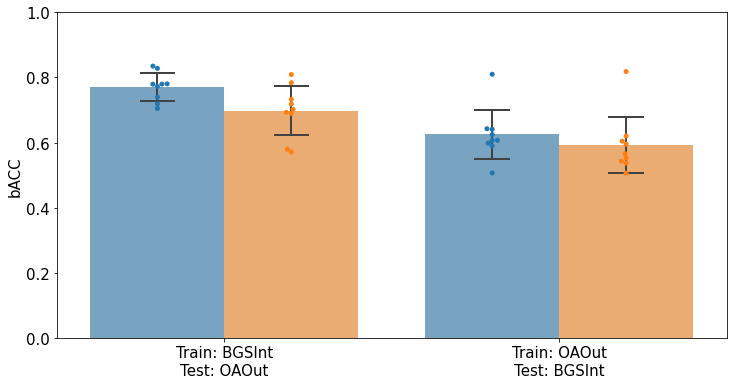

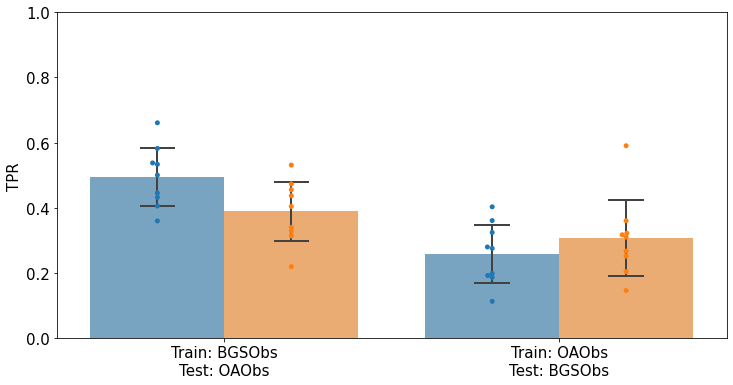

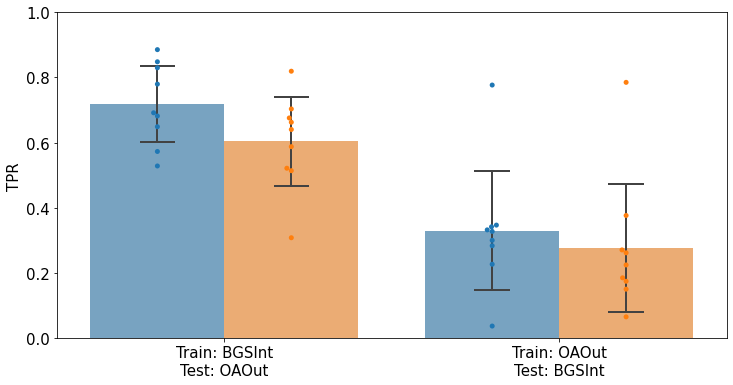

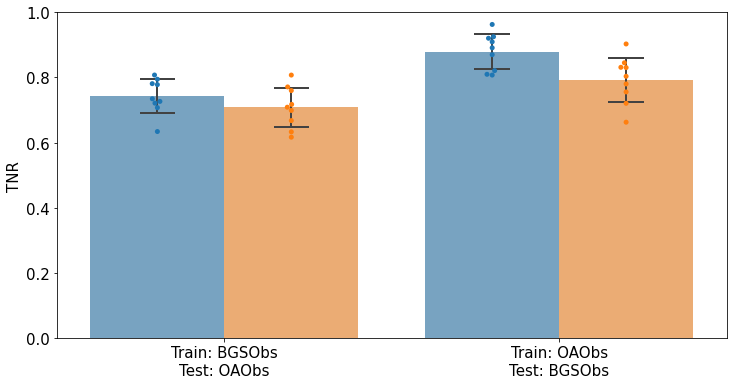

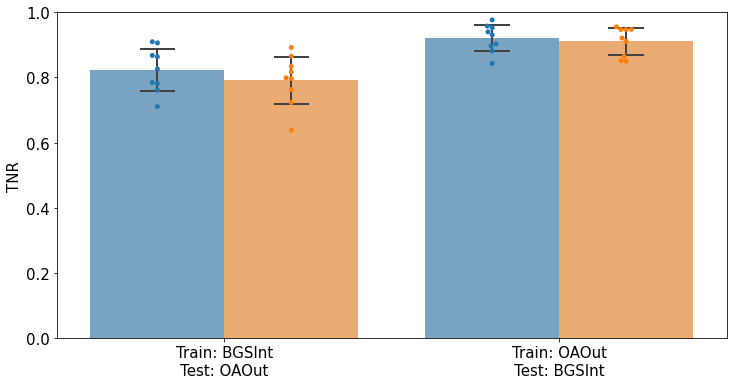

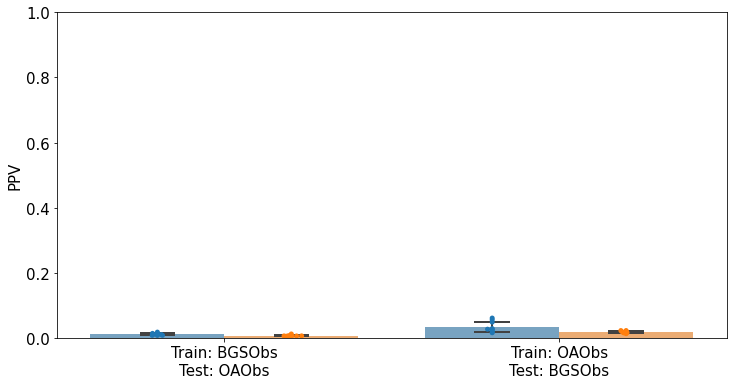

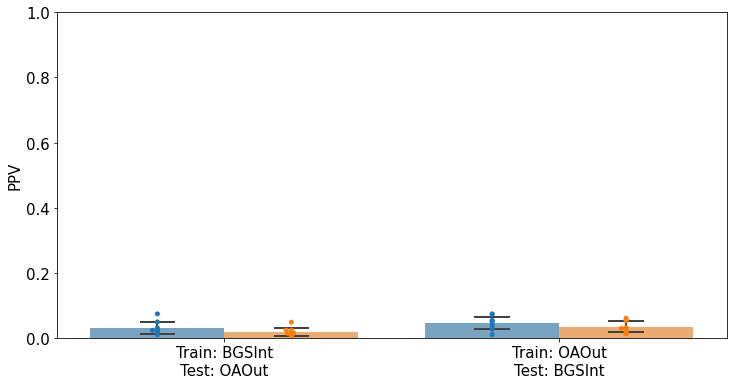

In [27]:
def get_same_subtask_set_locs(df, **kwargs):
    task = kwargs['task']
    condi1 = (df['tst_dataset'] == task[0]) & (df['tar_dataset'] == task[1]) 
    condi2 = (df['tst_dataset'] == task[1]) & (df['tar_dataset'] == task[0]) 
    condi = condi1 | condi2 
    return condi

def same_subtask_title(**kwargs):
    return f"Same Task: {' '.join(kwargs['task'])} - Score:{kwargs['dv']}"

def same_subtask_filename(**kwargs):
    return f"BAR_{'-'.join(kwargs['task'])}_{kwargs['dv']}"

mean_bar_pot(
    exps, 
    dependent_vars=['bACC', 'TPR', 'TNR', 'PPV'],
    task_plot_vars=[('BGSObs', 'OAObs'), ('BGSInt', 'OAOut')],
    loc_func=get_same_subtask_set_locs,
    title_func=None,  # set this to same_subtask_title to add title
    filename_func=same_subtask_filename,
    fontsize=15, # change font sizes of entire plot
    legend=False, # set to True to use legened
    use_xlabel=False, # Set to True to enable x-axis label
    file_ext='pdf', # change extension
    save_path=ssubtask_plots_path,
)

In [28]:
save_results(ssubtask_path, ssubtask_anlys, prefix='ssubtask_')